In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,6))

## Importing Bankruptcy Data 1

In [2]:
data = pd.read_excel('world_bankrupt_tech.xlsx',sheet_name = 'Sheet1')

data= data.iloc[:, 1:]

data=data.replace({'n.a.': np.nan,'n.s.': np.nan})

data.isna().sum(axis=1)

0      14
1      10
2       6
3      10
4       6
       ..
158    14
159     7
160    15
161    13
162    19
Length: 163, dtype: int64

In [3]:
pd.Series(data.columns)

0                           Company name Latin alphabet
1                                      Last avail. year
2         Operating revenue (Turnover)\nth USD Year - 1
3     Operating revenue (Turnover)\nth USD Last avai...
4                      Cash flow\nth USD Last avail. yr
5                            Cash flow\nth USD Year - 1
6                   Total assets\nth USD Last avail. yr
7                         Total assets\nth USD Year - 1
8                       Liquidity ratio\nLast avail. yr
9                             Liquidity ratio\nYear - 1
10                        Current ratio\nLast avail. yr
11                              Current ratio\nYear - 1
12                    Profit margin (%)\nLast avail. yr
13                          Profit margin (%)\nYear - 1
14     Solvency ratio (Asset based) (%)\nLast avail. yr
15           Solvency ratio (Asset based) (%)\nYear - 1
16    Working capital per employee (th) (th)\nth USD...
17    Working capital per employee (th) (th)\nth

In [4]:
# dropna
data1=data.dropna(thresh=26)

In [5]:
data1.columns

Index(['Company name Latin alphabet', 'Last avail. year',
       'Operating revenue (Turnover)\nth USD Year - 1',
       'Operating revenue (Turnover)\nth USD Last avail. yr',
       'Cash flow\nth USD Last avail. yr', 'Cash flow\nth USD Year - 1',
       'Total assets\nth USD Last avail. yr', 'Total assets\nth USD Year - 1',
       'Liquidity ratio\nLast avail. yr', 'Liquidity ratio\nYear - 1',
       'Current ratio\nLast avail. yr', 'Current ratio\nYear - 1',
       'Profit margin (%)\nLast avail. yr', 'Profit margin (%)\nYear - 1',
       'Solvency ratio (Asset based) (%)\nLast avail. yr',
       'Solvency ratio (Asset based) (%)\nYear - 1',
       'Working capital per employee (th) (th)\nth USD Last avail. yr',
       'Working capital per employee (th) (th)\nth USD Year - 1',
       'Profit per employee (th) (th)\nth USD Last avail. yr',
       'Profit per employee (th) (th)\nth USD Year - 1',
       'Intangible fixed assets\nth USD Last avail. yr',
       'Intangible fixed assets\

In [6]:
data1=data1.drop(data1.columns[100*(data1.isna().sum()/len(data1))>90], axis=1)

In [7]:
data1=data1.fillna(0)

check Size

In [8]:
data1.shape

(163, 43)

In [9]:
firm_group=data1['Total assets\nth USD Last avail. yr'].groupby(data1.index).mean()
firm_group.describe()

count    1.630000e+02
mean     1.059411e+04
std      8.500381e+04
min      1.762596e+01
25%      1.949163e+02
50%      3.948215e+02
75%      1.222451e+03
max      1.054261e+06
Name: Total assets\nth USD Last avail. yr, dtype: float64

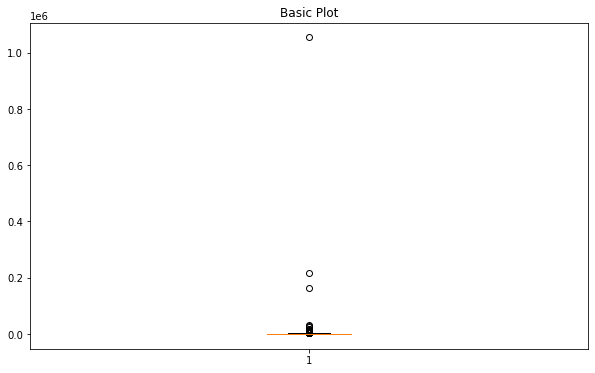

In [10]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data1['Total assets\nth USD Last avail. yr'])
plt.show()

(163, 43)

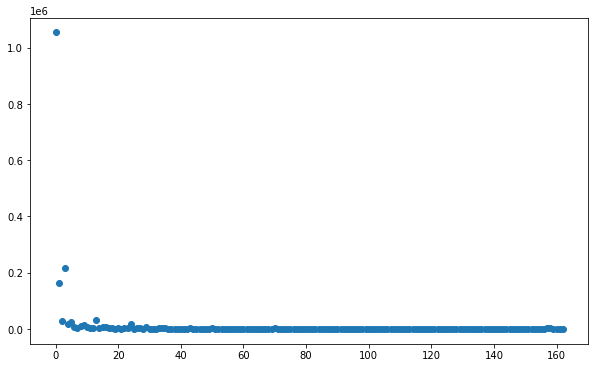

In [11]:
plt.scatter(data1.index,data1['Total assets\nth USD Last avail. yr'] )

data1.shape

In [12]:
## same size
data1=data1[ data1['Total assets\nth USD Last avail. yr'] < 1000]

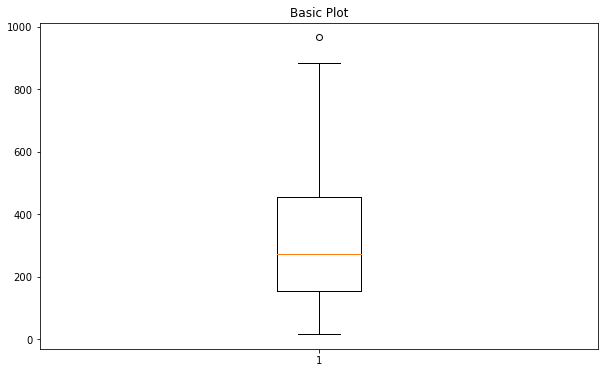

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data1['Total assets\nth USD Last avail. yr'])
plt.show()

(115, 43)

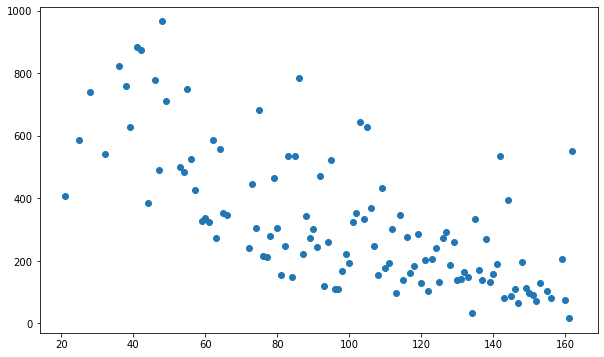

In [14]:
plt.scatter(data1.index,data1['Total assets\nth USD Last avail. yr'] )

data1.shape

In [15]:
pd.Series(data1.columns)

0                           Company name Latin alphabet
1                                      Last avail. year
2         Operating revenue (Turnover)\nth USD Year - 1
3     Operating revenue (Turnover)\nth USD Last avai...
4                      Cash flow\nth USD Last avail. yr
5                            Cash flow\nth USD Year - 1
6                   Total assets\nth USD Last avail. yr
7                         Total assets\nth USD Year - 1
8                       Liquidity ratio\nLast avail. yr
9                             Liquidity ratio\nYear - 1
10                        Current ratio\nLast avail. yr
11                              Current ratio\nYear - 1
12                    Profit margin (%)\nLast avail. yr
13                          Profit margin (%)\nYear - 1
14     Solvency ratio (Asset based) (%)\nLast avail. yr
15           Solvency ratio (Asset based) (%)\nYear - 1
16    Working capital per employee (th) (th)\nth USD...
17    Working capital per employee (th) (th)\nth

In [16]:
data1=data1.sample(59)

In [17]:
###calculate ratios 

data2=data1[['Company name Latin alphabet',
                  'Liquidity ratio\nLast avail. yr', 'Liquidity ratio\nYear - 1', 
                   'Current ratio\nLast avail. yr', 'Current ratio\nYear - 1',
                   'Profit margin (%)\nLast avail. yr', 'Profit margin (%)\nYear - 1',
                  'Solvency ratio (Asset based) (%)\nLast avail. yr',  'Solvency ratio (Asset based) (%)\nYear - 1',
                   'Profit per employee (th) (th)\nth USD Last avail. yr', 'Profit per employee (th) (th)\nth USD Year - 1',
                   'Intangible fixed assets\nth USD Last avail. yr', 'Intangible fixed assets\nth USD Year - 1',
                  
                ]]

data2['CL/TL avial year']=data1['Current liabilities\nth USD Last avail. yr']/(data1['Total shareh. funds & liab.\nth USD Last avail. yr']-data1['Shareholders funds\nth USD Last avail. yr']) -data1['Current liabilities\nth USD Year - 1']/(data1['Total shareh. funds & liab.\nth USD Year - 1']-data1['Shareholders funds\nth USD Year - 1'])
                                                                                    
data2['CL/TL year-1']=data1['Current liabilities\nth USD Year - 1']/(data1['Total shareh. funds & liab.\nth USD Year - 1']-data1['Shareholders funds\nth USD Year - 1']) -data1['Current liabilities\nth USD Year - 2']/(data1['Total shareh. funds & liab.\nth USD Year - 2']-data1['Shareholders funds\nth USD Year - 2'])
                                   

#data2['CF/CapEX avil year']=data1['Cash flow\nth USD Last avail. yr']/data1['Capital Expenditures\nth USD Last avail. yr']
#data2['CF/CapEX year-1']=data1['Cash flow\nth USD Year - 1']/data1[ 'Capital Expenditures\nth USD Year - 1']


#### add in 6 more Financial ratios
# 1. Cash flow / Operating revenue 
data2['Cash flow / Operating revenue'] = data1['Operating revenue (Turnover)\nth USD Last avail. yr']
data2['Cash flow / Operating revenue -1'] = data1['Operating revenue (Turnover)\nth USD Year - 1']


# 2. operating revenue per employee
data2['Operating revenue per employee'] = data1['Operating revenue per employee (th) (th)\nth USD Last avail. yr']
data2['Operating revenue per employee -1'] = data1['Operating revenue per employee (th) (th)\nth USD Year - 1']


#3. Costs of employees / Operating revenue 
data2['Costs of employees/Operating revenue'] = data1['Costs of employees\nth USD Last avail. yr'] / data1['Operating revenue (Turnover)\nth USD Last avail. yr']
data2['Costs of employees/Operating revenue-1'] = data1['Costs of employees\nth USD Year - 1'] / data1['Operating revenue (Turnover)\nth USD Year - 1']

#4. Working Capital/Total Assets
data2['Working Capital/Total Assets'] = data1['Working capital\nth USD Last avail. yr'] / data1['Total assets\nth USD Last avail. yr']
data2['Working Capital/Total Assets -1'] = data1['Working capital\nth USD Year - 1'] / data1['Total assets\nth USD Year - 1']


# 5. Earnings before Interest and Taxes / Total Assets
#data2['Earnings before Interest and Taxes / Total Assets'] = data1['Earnings before Interest & Tax\nth USD Last avail. yr'] / data1['Total assets\nth USD Last avail. yr']
#data2['Earnings before Interest and Taxes / Total Assets -1'] = data1['Earnings before Interest & Tax\nth USD Year - 1'] / data1['Total assets\nth USD Year - 1']

# 6.  Sales / Total Assets
data2['Sales/Total Asset'] = data1['Sales\nth USD Last avail. yr'] / data1['Total assets\nth USD Last avail. yr']
data2['Sales/Total Asset-1'] = data1['Sales\nth USD Year - 1'] / data1['Total assets\nth USD Year - 1']

In [18]:
pd.Series(data2.columns)

0                           Company name Latin alphabet
1                       Liquidity ratio\nLast avail. yr
2                             Liquidity ratio\nYear - 1
3                         Current ratio\nLast avail. yr
4                               Current ratio\nYear - 1
5                     Profit margin (%)\nLast avail. yr
6                           Profit margin (%)\nYear - 1
7      Solvency ratio (Asset based) (%)\nLast avail. yr
8            Solvency ratio (Asset based) (%)\nYear - 1
9     Profit per employee (th) (th)\nth USD Last ava...
10       Profit per employee (th) (th)\nth USD Year - 1
11       Intangible fixed assets\nth USD Last avail. yr
12             Intangible fixed assets\nth USD Year - 1
13                                     CL/TL avial year
14                                         CL/TL year-1
15                        Cash flow / Operating revenue
16                     Cash flow / Operating revenue -1
17                       Operating revenue per e

In [19]:
df1_a=data2.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24]]

df1_b=data2.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23]]

In [20]:
df1_a.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

df1_b.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

In [21]:
df_1_cat=pd.concat([df1_a,df1_b])
df_1_cat=df_1_cat.fillna(0)
df_1_cat.head()

,Company name,Liquidity ratio,Current ratio,Profit margin (%),Solvency ratio (Asset based) (%),Profit per employee,Intangible fixed assets,CL/TL,CF/Operating Revenue,Operating revenue per employee,Costs of employees/Operating revenue,Working Capital/Total Assets,Sales/Total Asset
44,EUROPA DEVICES S.L.,0.470,0.962,0.121,1.726,0.364927,2.633853,5.206842e-02,2119.650601,302.807229,0.087801,0.694966,0.807573
73,ALAIN SANCHEZ INFORMATIQUE,0.350,0.350,6.093,-34.215,0.000000,258.679240,8.560237e-02,1298.048707,0.000000,0.679570,0.017637,2.194004
122,SARL IRIS,0.817,1.092,0.297,15.205,0.147200,0.000000,-5.771677e-02,297.637452,49.606242,0.400593,0.584795,1.900585
148,P.G.C.D.,0.812,0.812,-26.301,-9.901,-12.213927,0.000000,-2.220446e-15,325.068574,46.438368,0.904110,0.351485,1.806931
149,DATA NUMERICAL CONTROL,0.948,0.948,-1.909,15.847,-1.488801,7.444007,-1.887379e-15,389.879862,77.975972,0.658711,0.612022,2.273224


In [22]:
df_1_cat.shape

(118, 13)

In [23]:
#df_1_cat = df_1_cat.sample(n=118)

In [24]:
df_1_cat.shape

(118, 13)

## Importing None-Bankruptcy data  0

In [25]:
## importing the active firms

# 0 stands for not default
df_0 = pd.read_excel('Active Companies.xlsx', sheet_name = 'Sheet2')
# matching the timestamp
#df_0 = df_0[(df_0['Last avail. year'] > 1995) & (df_0['Last avail. year'] < 2009)]


df_0=df_0.replace({'n.a.': np.nan,'n.s.': np.nan})
df_0.shape  

(66, 50)

Check Assets Size

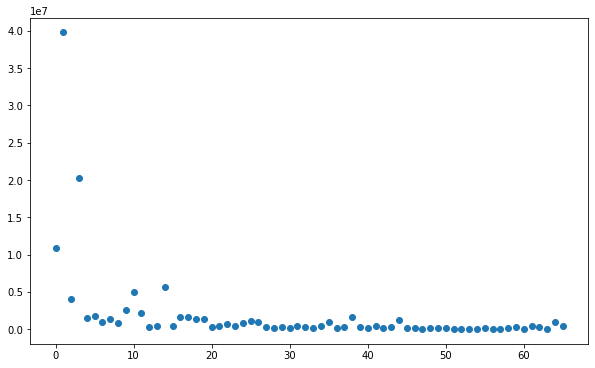

In [26]:
plt.scatter(df_0.index,df_0['Total assets\nth USD Last avail. yr'] )

In [27]:
df_0.describe()

,Unnamed: 0,Last avail. year,Operating revenue (Turnover)\nth USD Year - 1,Operating revenue (Turnover)\nth USD Last avail. yr,Cash flow\nth USD Last avail. yr,Cash flow\nth USD Year - 1,Total assets\nth USD Last avail. yr,Total assets\nth USD Year - 1,Liquidity ratio\nLast avail. yr,Liquidity ratio\nYear - 1,...,Operating revenue per employee (th) (th)\nth USD Last avail. yr,Operating revenue per employee (th) (th)\nth USD Year - 1,Costs of employees / Operating revenue (%)\nLast avail. yr,Costs of employees / Operating revenue (%)\nYear - 1,Working capital\nth USD Last avail. yr,Working capital\nth USD Year - 1,Earnings before Interest & Tax\nth USD Last avail. yr,Earnings before Interest & Tax\nth USD Year - 1,Sales\nth USD Last avail. yr,Sales\nth USD Year - 1
count,66.000000,66.000000,6.300000e+01,6.600000e+01,6.300000e+01,6.200000e+01,6.600000e+01,6.300000e+01,66.000000,63.000000,...,51.000000,48.000000,6.000000,7.000000,2.800000e+01,28.000000,6.400000e+01,6.300000e+01,6.500000e+01,6.300000e+01
mean,1830.060606,1999.969697,4.479678e+05,5.523637e+05,-4.086465e+04,3.980628e+05,1.805324e+06,1.170576e+06,1.842152,2.099730,...,2327.679985,162.940225,16.880833,15.832571,1.396082e+05,74452.722134,-1.746227e+05,-6.527885e+04,5.473610e+05,4.455258e+05
std,872.434981,0.655619,7.885154e+05,9.724593e+05,7.349648e+05,3.490765e+06,5.561191e+06,3.611680e+06,1.596563,1.764368,...,10781.829551,103.316253,20.191431,17.665671,4.062870e+05,182944.457421,5.996320e+05,2.812322e+05,9.763861e+05,7.877064e+05
min,222.000000,1999.000000,1.078700e+04,9.953749e+04,-1.869200e+06,-1.449225e+06,1.594700e+04,2.194700e+04,0.058000,0.026000,...,64.519304,13.717791,0.243000,0.114000,-3.800000e+04,-67971.317841,-3.403000e+06,-1.713601e+06,9.516770e+04,1.078700e+04
25%,1024.000000,2000.000000,8.994129e+04,1.275475e+05,-8.045650e+04,-5.112500e+04,1.487644e+05,1.332561e+05,0.811000,0.925500,...,153.205111,113.100233,1.221750,0.915000,1.116555e+04,9951.939110,-1.519000e+05,-8.783300e+04,1.259380e+05,8.994129e+04
50%,2026.500000,2000.000000,1.921240e+05,2.529096e+05,5.778000e+03,2.572000e+03,3.578477e+05,3.037980e+05,1.518500,1.688000,...,209.537313,141.757624,10.440000,15.220000,2.801350e+04,23835.249139,-1.845013e+04,-5.365000e+03,2.496472e+05,1.920720e+05
75%,2546.250000,2000.000000,4.076019e+05,4.942719e+05,2.437120e+04,1.900250e+04,1.194902e+06,1.040808e+06,2.288250,2.551500,...,354.242895,187.933162,26.042250,22.733500,5.396150e+04,47035.342297,1.853927e+04,1.540106e+04,4.685790e+05,4.042188e+05
max,3090.000000,2001.000000,4.990420e+06,7.013461e+06,4.702000e+06,2.737900e+07,3.978600e+07,2.819200e+07,8.358000,8.834000,...,70214.991010,586.962308,50.770000,48.197000,2.087433e+06,921152.249145,6.181667e+05,5.935315e+05,7.013461e+06,4.990420e+06


In [28]:
df_0=df_0.fillna(0)


df_0 = df_0[ df_0['Total assets\nth USD Last avail. yr'] < 2389804]

In [29]:
df_0.shape

(59, 50)

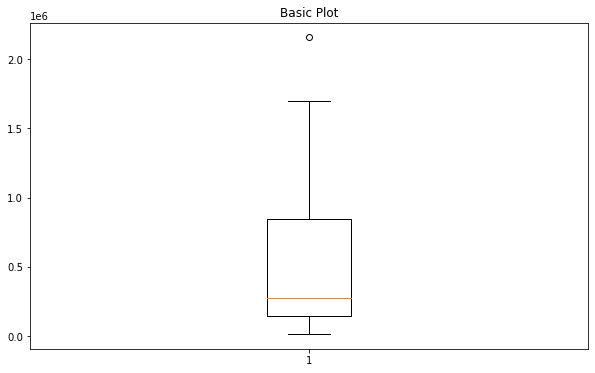

In [30]:
fig2, ax2 = plt.subplots()
ax2.set_title('Basic Plot')
ax2.boxplot(df_0['Total assets\nth USD Last avail. yr'])
plt.show()

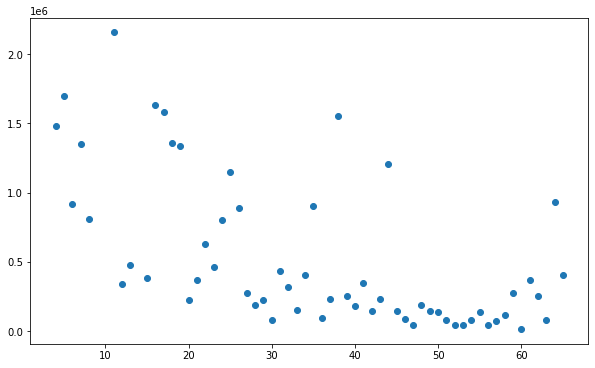

In [31]:
plt.scatter(df_0.index,df_0['Total assets\nth USD Last avail. yr'] )

In [32]:
###calculate ratios 

data2_0=df_0[['Company name Latin alphabet',
                  'Liquidity ratio\nLast avail. yr', 'Liquidity ratio\nYear - 1', 
                   'Current ratio\nLast avail. yr', 'Current ratio\nYear - 1',
                   'Profit margin (%)\nLast avail. yr', 'Profit margin (%)\nYear - 1',
                  'Solvency ratio (Asset based) (%)\nLast avail. yr',  'Solvency ratio (Asset based) (%)\nYear - 1',
                   'Profit per employee (th) (th)\nth USD Last avail. yr', 'Profit per employee (th) (th)\nth USD Year - 1',
                   'Intangible fixed assets\nth USD Last avail. yr', 'Intangible fixed assets\nth USD Year - 1',
                  
                ]]

data2_0['CL/TL avial year']=df_0['Current liabilities\nth USD Last avail. yr']/(df_0['Total shareh. funds & liab.\nth USD Last avail. yr']-df_0['Shareholders funds\nth USD Last avail. yr']) -df_0['Current liabilities\nth USD Year - 1']/(df_0['Total shareh. funds & liab.\nth USD Year - 1']-df_0['Shareholders funds\nth USD Year - 1'])
                                                                                    
data2_0['CL/TL year-1']=df_0['Current liabilities\nth USD Year - 1']/(df_0['Total shareh. funds & liab.\nth USD Year - 1']-df_0['Shareholders funds\nth USD Year - 1']) -df_0['Current liabilities\nth USD Year - 2']/(df_0['Total shareh. funds & liab.\nth USD Year - 2']-df_0['Shareholders funds\nth USD Year - 2'])
                                   

#data2['CF/CapEX avil year']=data1['Cash flow\nth USD Last avail. yr']/data1['Capital Expenditures\nth USD Last avail. yr']
#data2['CF/CapEX year-1']=data1['Cash flow\nth USD Year - 1']/data1[ 'Capital Expenditures\nth USD Year - 1']


#### add in 6 more Financial ratios
# 1. Cash flow / Operating revenue 
data2_0['Cash flow / Operating revenue'] = df_0['Operating revenue (Turnover)\nth USD Last avail. yr']
data2_0['Cash flow / Operating revenue -1'] = df_0['Operating revenue (Turnover)\nth USD Year - 1']


# 2. operating revenue per employee
data2_0['Operating revenue per employee'] = df_0['Operating revenue per employee (th) (th)\nth USD Last avail. yr']
data2_0['Operating revenue per employee -1'] = df_0['Operating revenue per employee (th) (th)\nth USD Year - 1']


#3. Costs of employees / Operating revenue 
data2_0['Costs of employees/Operating revenue'] = df_0['Costs of employees\nth USD Last avail. yr'] / df_0['Operating revenue (Turnover)\nth USD Last avail. yr']
data2_0['Costs of employees/Operating revenue-1'] = df_0['Costs of employees\nth USD Year - 1'] / df_0['Operating revenue (Turnover)\nth USD Year - 1']

#4. Working Capital/Total Assets
data2_0['Working Capital/Total Assets'] = df_0['Working capital\nth USD Last avail. yr'] / df_0['Total assets\nth USD Last avail. yr']
data2_0['Working Capital/Total Assets -1'] = df_0['Working capital\nth USD Year - 1'] / df_0['Total assets\nth USD Year - 1']


# 5. Earnings before Interest and Taxes / Total Assets
#data2['Earnings before Interest and Taxes / Total Assets'] = data1['Earnings before Interest & Tax\nth USD Last avail. yr'] / data1['Total assets\nth USD Last avail. yr']
#data2['Earnings before Interest and Taxes / Total Assets -1'] = data1['Earnings before Interest & Tax\nth USD Year - 1'] / data1['Total assets\nth USD Year - 1']

# 6.  Sales / Total Assets
data2_0['Sales/Total Asset'] = df_0['Sales\nth USD Last avail. yr'] / df_0['Total assets\nth USD Last avail. yr']
data2_0['Sales/Total Asset-1'] = df_0['Sales\nth USD Year - 1'] / df_0['Total assets\nth USD Year - 1']

In [33]:
df2_a=data2_0.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24]]

df2_b=data2_0.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23]]

In [34]:
df2_a.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

df2_b.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

In [35]:
df_2_cat=pd.concat([df2_a,df2_b])
df_2_cat=df_2_cat.fillna(0)

In [36]:
# None bankrupt  == Active firms
df_2_cat.shape

(118, 13)

## PCA

Step1: Principle Component Analysis on `defalut data`

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [38]:
features = df_1_cat.columns[1:].values
x = df_1_cat.loc[:, features].values

x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

,Liquidity ratio,Current ratio,Profit margin (%),Solvency ratio (Asset based) (%),Profit per employee,Intangible fixed assets,CL/TL,CF/Operating Revenue,Operating revenue per employee,Costs of employees/Operating revenue,Working Capital/Total Assets,Sales/Total Asset
0,-0.344566,-0.172003,-0.009817,-0.543559,0.099852,-0.466738,0.333030,2.029065,1.238703,-1.096103,1.014276,-0.971917
1,-0.390143,-0.312624,0.640443,-1.964603,0.057842,4.453513,0.518996,0.793353,-0.412431,0.785228,-1.289592,-0.126668
2,-0.212772,-0.142132,0.009347,-0.010623,0.074788,-0.517351,-0.275796,-0.711294,-0.141940,-0.101684,0.639541,-0.305553
3,-0.214671,-0.206469,-2.886770,-1.003270,-1.348192,-0.517351,0.044279,-0.670037,-0.159214,1.499077,-0.154040,-0.362650
4,-0.163016,-0.175220,-0.230853,0.014760,-0.113544,-0.374305,0.044279,-0.572559,0.012753,0.718915,0.732149,-0.078370


In [39]:
pca = PCA(n_components=8)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])

In [40]:
principalDf.head(5)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,0.867605,-0.069326,0.665396,-0.541109,-0.597554,-1.822975,-1.330754,0.713797
1,-1.038723,1.807833,1.819744,3.701694,-1.424782,-0.242677,-0.354481,-0.718081
2,-0.368985,-0.123361,-0.842909,-0.554756,0.093864,-0.385465,0.161168,0.187547
3,-1.362096,2.756174,0.297966,-1.512869,-0.062178,0.768751,0.912578,0.109355
4,-0.510546,0.146510,-0.627754,-0.708438,-0.486010,0.197183,0.325772,0.038796


In [41]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
per_var

array([26.7, 17.4, 11.7,  9.5,  8.5,  7. ,  5.8,  4.4])

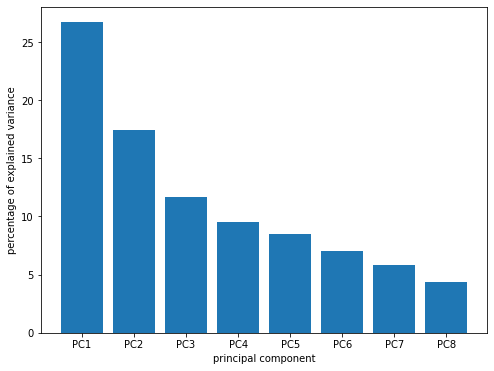

In [42]:
plt.figure(figsize=(8,6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal component')

plt.show()

In [43]:
pca.explained_variance_ratio_

array([0.26707132, 0.17355688, 0.11745175, 0.09473271, 0.08498862,
       0.06950815, 0.05773942, 0.04429457])

In [44]:
pca.explained_variance_ratio_.sum()

0.9093434302855654

In [45]:
principalDf.index=df_1_cat.index

In [46]:
data_merge = pd.concat([df_1_cat, principalDf], axis=1)

## Select Financial Ratios

In [47]:
data_merge.corr()

,Liquidity ratio,Current ratio,Profit margin (%),Solvency ratio (Asset based) (%),Profit per employee,Intangible fixed assets,CL/TL,CF/Operating Revenue,Operating revenue per employee,Costs of employees/Operating revenue,Working Capital/Total Assets,Sales/Total Asset,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
Liquidity ratio,1.000000,0.990414,0.063427,0.154671,0.112607,-0.061147,-0.458594,0.313768,0.683116,-0.149658,-0.006241,0.158523,9.181314e-01,1.448107e-01,-1.554189e-01,2.913694e-02,-3.020329e-03,2.095206e-01,1.650917e-01,8.793344e-02
Current ratio,0.990414,1.000000,0.039257,0.075683,0.094556,-0.048800,-0.476415,0.319160,0.704659,-0.170778,-0.004750,0.147606,9.213753e-01,1.913912e-01,-1.396764e-01,2.188847e-02,7.512844e-03,1.481012e-01,1.677867e-01,7.522849e-02
Profit margin (%),0.063427,0.039257,1.000000,0.487281,0.440337,-0.228774,0.008967,0.057382,-0.017469,-0.185225,0.048512,0.050211,1.736427e-01,-7.089102e-01,-3.462106e-01,2.504891e-01,9.063767e-02,1.468384e-02,-2.856045e-01,-1.802978e-01
Solvency ratio (Asset based) (%),0.154671,0.075683,0.487281,1.000000,0.259107,-0.179622,0.156505,0.096918,-0.081300,-0.136790,0.093297,0.233200,1.803828e-01,-7.139760e-01,-1.185028e-01,5.877129e-02,-5.722696e-02,4.835675e-01,-1.753756e-01,2.767077e-01
Profit per employee,0.112607,0.094556,0.440337,0.259107,1.000000,0.037945,0.041698,0.008837,0.002828,-0.184649,0.127374,0.101745,1.814684e-01,-5.544132e-01,-2.397828e-01,4.609155e-01,-2.137825e-01,-3.401409e-01,3.933965e-01,-1.495944e-01
Intangible fixed assets,-0.061147,-0.048800,-0.228774,-0.179622,0.037945,1.000000,0.046341,0.151542,0.004076,0.177485,-0.200462,-0.156897,-1.017499e-01,3.593935e-01,3.029319e-01,7.115818e-01,-4.054064e-01,1.059631e-02,-4.114095e-02,1.416194e-01
CL/TL,-0.458594,-0.476415,0.008967,0.156505,0.041698,0.046341,1.000000,-0.074185,-0.335303,-0.009725,-0.031865,0.234299,-4.822878e-01,-4.158818e-01,4.844498e-01,-1.214626e-02,-9.661532e-02,1.475828e-01,2.743301e-01,3.067066e-01
CF/Operating Revenue,0.313768,0.319160,0.057382,0.096918,0.008837,0.151542,-0.074185,1.000000,0.418738,-0.251987,0.050648,0.374986,5.356230e-01,-7.651770e-02,5.272391e-01,2.154592e-02,-3.250651e-01,-8.610202e-02,-4.623719e-01,-1.436096e-01
Operating revenue per employee,0.683116,0.704659,-0.017469,-0.081300,0.002828,0.004076,-0.335303,0.418738,1.000000,-0.244511,0.003693,0.162755,8.096665e-01,2.341836e-01,1.068931e-01,-3.171822e-02,-1.364588e-02,-1.037892e-01,3.097905e-02,1.100533e-01
Costs of employees/Operating revenue,-0.149658,-0.170778,-0.185225,-0.136790,-0.184649,0.177485,-0.009725,-0.251987,-0.244511,1.000000,0.109890,-0.263212,-3.671720e-01,3.657660e-01,-3.181372e-01,-2.719937e-03,-4.697658e-01,5.200370e-01,7.671930e-02,-2.969526e-01


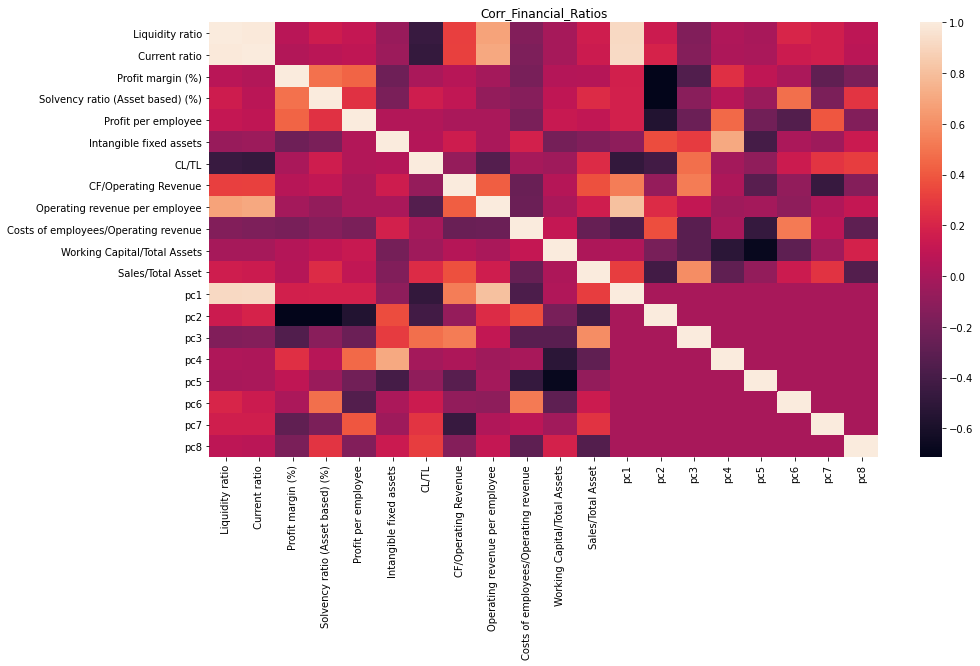

<Figure size 720x576 with 0 Axes>

In [48]:
import seaborn as sns
plt.figure(figsize=(15,8))
plot=sns.heatmap(data_merge.corr())
#plt.setp(plot.get_xticklabels(), rotation=0)
plt.title('Corr_Financial_Ratios')
plt.figure(figsize=(10,8))
plt.show()

In [49]:
data_merge.columns

Index(['Company name', ' Liquidity ratio', ' Current ratio',
       'Profit margin (%)', 'Solvency ratio (Asset based) (%)',
       'Profit per employee', 'Intangible fixed assets', 'CL/TL',
       'CF/Operating Revenue', 'Operating revenue per employee',
       'Costs of employees/Operating revenue', 'Working Capital/Total Assets',
       'Sales/Total Asset', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7',
       'pc8'],
      dtype='object')

## ratios selected for default data
 ` Current ratio` 
 `CL/TL`
 `CF/Operating Revenue`
 `Operating revenue per employee`
  `Profit margin (%)` 
  `Solvency ratio (Asset based) (%)`
  `Working Capital/Total Assets`
  `Sales/Total Asset`
  `Costs of employees/Operating revenue`
  `Intangible fixed assets`
  

-

Step2: Principle Component Analysis on `None Bankruptcy` data

In [50]:
features = df_2_cat.columns[1:].values
x = df_2_cat.loc[:, features].values

x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

,Liquidity ratio,Current ratio,Profit margin (%),Solvency ratio (Asset based) (%),Profit per employee,Intangible fixed assets,CL/TL,CF/Operating Revenue,Operating revenue per employee,Costs of employees/Operating revenue,Working Capital/Total Assets,Sales/Total Asset
0,-0.708301,-0.737793,1.069461,-0.183044,3.386892,3.167808,-0.622493,3.288051,-0.066059,-0.210571,-0.487749,0.231423
1,1.154596,1.505266,0.331831,0.588826,-0.002445,-0.297574,-2.133483,2.311594,-0.148663,-0.210571,1.424230,-0.204536
2,-0.476600,-0.512697,0.576150,0.260921,0.361350,-0.171253,0.446263,2.226607,-0.127795,-0.210571,-0.487749,0.441229
3,-0.962068,-0.967966,1.396717,-0.552834,-0.002445,0.343830,1.011014,1.935178,-0.148663,-0.210571,-0.226989,-0.153608
4,-0.361040,-0.400432,0.279330,0.330051,-0.002445,-0.543212,0.006142,0.824314,-0.148663,-0.210571,0.646434,0.717568


In [51]:
pca = PCA(n_components=8)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5','pc6','pc7','pc8'])

In [52]:
principalDf.head(5)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-1.527450,-0.012217,5.122831,1.932721,0.429983,-0.640482,-0.128044,1.062017
1,1.860590,-0.277235,0.809619,2.730150,0.622949,-0.061777,-0.084956,-0.588363
2,-0.848932,-0.417992,1.270441,0.252314,1.331875,-1.251876,-0.040843,-0.453152
3,-1.770430,-0.474233,1.394942,-0.261918,1.387232,-0.881835,-0.309347,0.139399
4,-0.327209,-0.925185,-0.106134,0.614373,0.715552,-0.513523,-0.339965,-0.180065


In [53]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
per_var

array([20.8, 15. , 12.8, 10.1,  8.9,  7.3,  6.9,  5.7])

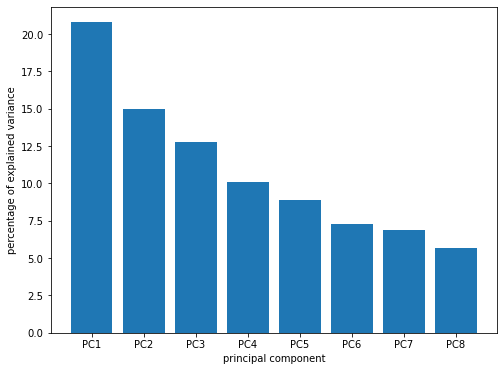

In [54]:
plt.figure(figsize=(8,6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal component')

plt.show()

In [55]:
pca.explained_variance_ratio_

array([0.20795071, 0.14984407, 0.12790215, 0.1006053 , 0.08904091,
       0.07260743, 0.06856817, 0.05699213])

In [56]:
pca.explained_variance_ratio_.sum()

0.873510854466931

In [57]:
principalDf.index=df_2_cat.index

In [58]:
data_merge = pd.concat([df_2_cat, principalDf], axis=1)

## Select Financial Ratios

In [59]:
data_merge.corr()

,Liquidity ratio,Current ratio,Profit margin (%),Solvency ratio (Asset based) (%),Profit per employee,Intangible fixed assets,CL/TL,CF/Operating Revenue,Operating revenue per employee,Costs of employees/Operating revenue,Working Capital/Total Assets,Sales/Total Asset,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
Liquidity ratio,1.000000,0.994554,-0.064743,0.469794,-0.019590,-0.031820,-0.078180,-0.141173,0.286705,0.052684,0.018529,-0.027779,9.368193e-01,2.343360e-01,-1.802284e-02,-2.003480e-02,1.964311e-04,-5.228965e-02,6.612237e-03,8.856345e-02
Current ratio,0.994554,1.000000,-0.059245,0.467676,-0.018671,-0.021791,-0.102483,-0.138796,0.272143,0.048926,0.079104,-0.033107,9.384983e-01,2.197760e-01,-2.378977e-02,2.340532e-02,-1.253394e-02,-3.668397e-02,-1.800586e-02,1.136560e-01
Profit margin (%),-0.064743,-0.059245,1.000000,0.207458,0.392750,-0.221169,0.025537,0.138211,0.127119,0.305059,0.140405,0.163487,1.064654e-01,-7.079438e-01,4.597442e-01,-1.975984e-01,1.866480e-01,1.235298e-02,-1.704810e-01,-9.960351e-02
Solvency ratio (Asset based) (%),0.469794,0.467676,0.207458,1.000000,0.073724,-0.024716,-0.103997,-0.044670,0.062502,0.107075,0.061052,0.064875,6.613174e-01,-1.212878e-01,1.688069e-01,6.294970e-02,-1.053595e-01,-4.044261e-01,-1.660271e-01,-2.938550e-01
Profit per employee,-0.019590,-0.018671,0.392750,0.073724,1.000000,0.161891,-0.084826,0.075635,-0.003165,0.137196,-0.039517,-0.087407,2.792572e-02,-2.762710e-01,7.151176e-01,-5.550940e-02,-2.661796e-01,2.069799e-01,-2.862623e-01,1.061596e-01
Intangible fixed assets,-0.031820,-0.021791,-0.221169,-0.024716,0.161891,1.000000,-0.069761,0.276385,-0.017527,-0.112873,-0.177856,-0.259468,-1.354391e-01,5.066901e-01,5.153614e-01,3.140086e-01,-1.589750e-01,-1.170101e-01,1.258814e-01,4.142300e-01
CL/TL,-0.078180,-0.102483,0.025537,-0.103997,-0.084826,-0.069761,1.000000,-0.053797,0.002527,-0.045457,-0.191480,-0.068181,-1.718032e-01,1.126679e-01,-9.712379e-02,-7.178689e-01,2.384720e-01,-3.759603e-01,-2.780040e-01,3.886185e-01
CF/Operating Revenue,-0.141173,-0.138796,0.138211,-0.044670,0.075635,0.276385,-0.053797,1.000000,0.048318,-0.129096,-0.093232,0.020675,-2.141167e-01,7.615642e-02,5.169330e-01,3.670493e-01,5.103150e-01,-3.449159e-01,1.047373e-01,-4.237605e-02
Operating revenue per employee,0.286705,0.272143,0.127119,0.062502,-0.003165,-0.017527,0.002527,0.048318,1.000000,-0.028368,-0.059348,-0.027117,3.710191e-01,1.044190e-01,1.748147e-01,-1.848941e-01,6.304592e-01,5.143887e-01,1.939145e-01,5.442189e-02
Costs of employees/Operating revenue,0.052684,0.048926,0.305059,0.107075,0.137196,-0.112873,-0.045457,-0.129096,-0.028368,1.000000,0.026923,0.145246,1.713857e-01,-5.196734e-01,1.429837e-01,-2.690064e-01,-3.459554e-01,-5.216558e-02,6.094567e-01,2.093051e-01


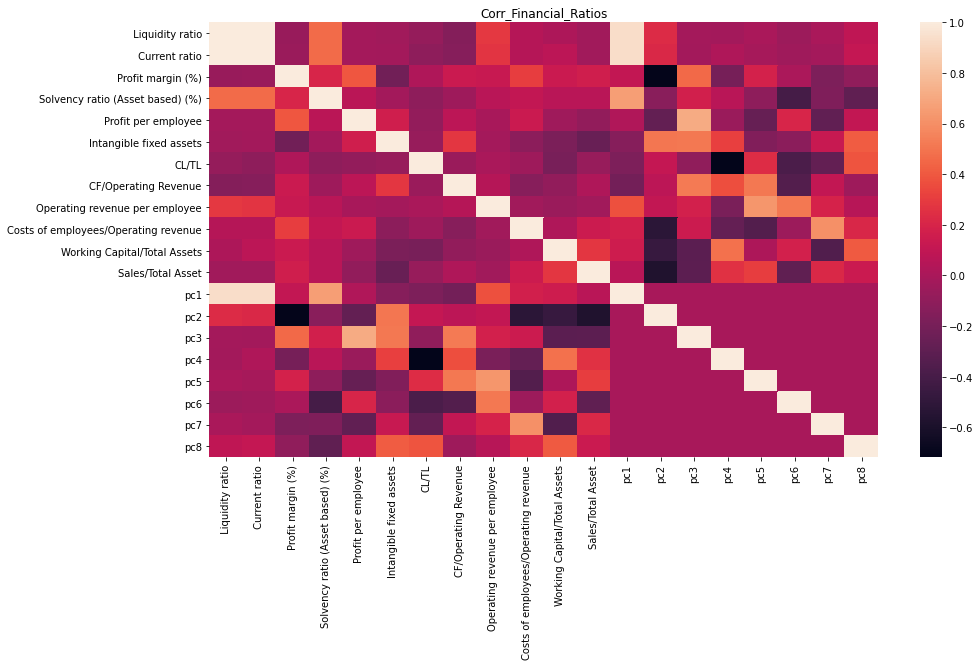

<Figure size 720x576 with 0 Axes>

In [60]:
import seaborn as sns
plt.figure(figsize=(15,8))
plot=sns.heatmap(data_merge.corr())
#plt.setp(plot.get_xticklabels(), rotation=0)
plt.title('Corr_Financial_Ratios')
plt.figure(figsize=(10,8))
plt.show()

## ratios selected for none defualt data
 ` Current ratio` 
  `Profit margin (%)` 
  `Solvency ratio (Asset based) (%)`
  `Sales/Total Asset`
  `Costs of employees/Operating revenue`
  `Intangible fixed assets`
  `CF/Operating Revenue`
  `Profit per employee`
   `CL/TL`

-

## common ratios 
` Current ratio` 
`Profit margin (%)` 
`Solvency ratio (Asset based) (%)`
`CL/TL`
`Costs of employees/Operating revenue`
`Sales/Total Asset`
 `Profit per employee`
 `Intangible fixed assets`
`CF/Operating Revenue`

In [61]:
# Bankruptcy stands for 1
# None Bankruptcy stands for 0
df_1_cat.insert(0, 'Status', int(1))
df_2_cat.insert(0,'Status', int(0))

train_df=pd.concat([df_1_cat,df_2_cat])

In [62]:
train_df=train_df.fillna(0)

In [63]:
train_df.isna().sum()

Status                                  0
Company name                            0
 Liquidity ratio                        0
 Current ratio                          0
Profit margin (%)                       0
Solvency ratio (Asset based) (%)        0
Profit per employee                     0
Intangible fixed assets                 0
CL/TL                                   0
CF/Operating Revenue                    0
Operating revenue per employee          0
Costs of employees/Operating revenue    0
Working Capital/Total Assets            0
Sales/Total Asset                       0
dtype: int64

In [64]:
train_df

,Status,Company name,Liquidity ratio,Current ratio,Profit margin (%),Solvency ratio (Asset based) (%),Profit per employee,Intangible fixed assets,CL/TL,CF/Operating Revenue,Operating revenue per employee,Costs of employees/Operating revenue,Working Capital/Total Assets,Sales/Total Asset
44,1,EUROPA DEVICES S.L.,0.470,0.962,0.121,1.726,0.364927,2.633853,5.206842e-02,2119.650601,302.807229,0.087801,0.694966,0.807573
73,1,ALAIN SANCHEZ INFORMATIQUE,0.350,0.350,6.093,-34.215,0.000000,258.679240,8.560237e-02,1298.048707,0.000000,0.679570,0.017637,2.194004
122,1,SARL IRIS,0.817,1.092,0.297,15.205,0.147200,0.000000,-5.771677e-02,297.637452,49.606242,0.400593,0.584795,1.900585
148,1,P.G.C.D.,0.812,0.812,-26.301,-9.901,-12.213927,0.000000,-2.220446e-15,325.068574,46.438368,0.904110,0.351485,1.806931
149,1,DATA NUMERICAL CONTROL,0.948,0.948,-1.909,15.847,-1.488801,7.444007,-1.887379e-15,389.879862,77.975972,0.658711,0.612022,2.273224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,QUEBECTEL GROUP INC,0.506,0.506,8.495,40.651,0.000000,12383.495627,1.016654e-02,103602.615777,0.000000,0.000000,0.000000,0.278362
62,0,SOON COMMUNICATIONS PLC,2.636,2.833,70.982,77.163,81.100995,5754.625135,-3.655939e-02,102602.003638,114.256129,0.284090,0.045217,0.403624
63,0,BREAKAWAY SOLUTIONS INC,0.823,0.823,0.000,54.861,0.000000,0.000000,7.460173e-02,102479.000000,303.192308,0.000000,0.000000,1.326211
64,0,LIBERTY DIGITAL INC,0.218,0.256,0.000,33.579,275.696429,474602.000000,-1.458685e-01,100727.000000,179.869643,0.000000,0.000000,0.108418


## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm;
import statsmodels.discrete.discrete_model as smdiscrete
pd.set_option('use_inf_as_na', True)

In [66]:
logisticRegr = LogisticRegression()

In [67]:
# ` Current ratio` 
# `Profit margin (%)` 
# `Solvency ratio (Asset based) (%)`
# `CL/TL`
# `Costs of employees/Operating revenue`
# `Sales/Total Asset`
#  `Profit per employee`
#  `Intangible fixed assets`
# `CF/Operating Revenue`

In [68]:
### log value

In [69]:
log_train_df= np.log10(train_df.iloc[:, 2:]).round(4)

In [70]:
log_train_df

,Liquidity ratio,Current ratio,Profit margin (%),Solvency ratio (Asset based) (%),Profit per employee,Intangible fixed assets,CL/TL,CF/Operating Revenue,Operating revenue per employee,Costs of employees/Operating revenue,Working Capital/Total Assets,Sales/Total Asset
44,-0.3279,-0.0168,-0.9172,0.2370,-0.4378,0.4206,-1.2834,3.3263,2.4812,-1.0565,-0.1580,-0.0928
73,-0.4559,-0.4559,0.7848,NaN,NaN,2.4128,-1.0675,3.1133,NaN,-0.1678,-1.7536,0.3412
122,-0.0878,0.0382,-0.5272,1.1820,-0.8321,NaN,NaN,2.4737,1.6955,-0.3973,-0.2330,0.2789
148,-0.0904,-0.0904,NaN,NaN,NaN,NaN,NaN,2.5120,1.6669,-0.0438,-0.4541,0.2569
149,-0.0232,-0.0232,NaN,1.1999,NaN,0.8718,NaN,2.5909,1.8920,-0.1813,-0.2132,0.3566
...,...,...,...,...,...,...,...,...,...,...,...,...
61,-0.2958,-0.2958,0.9292,1.6091,NaN,4.0928,-1.9928,5.0154,NaN,NaN,NaN,-0.5554
62,0.4209,0.4522,1.8511,1.8874,1.9090,3.7600,NaN,5.0112,2.0579,-0.5465,-1.3447,-0.3940
63,-0.0846,-0.0846,NaN,1.7393,NaN,NaN,-1.1273,5.0106,2.4817,NaN,NaN,0.1226
64,-0.6615,-0.5918,NaN,1.5261,2.4404,5.6763,NaN,5.0031,2.2550,NaN,NaN,-0.9649


In [71]:
log_train_df=log_train_df.fillna(0)

In [72]:
result = smdiscrete.Logit(train_df['Status'].values, log_train_df[[' Current ratio' ,'Intangible fixed assets','CF/Operating Revenue', 'Costs of employees/Operating revenue','Sales/Total Asset']]).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.332247
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  236
Model:                          Logit   Df Residuals:                      231
Method:                           MLE   Df Model:                            4
Date:                Mon, 03 May 2021   Pseudo R-squ.:                  0.5207
Time:                        16:10:33   Log-Likelihood:                -78.410
converged:                       True   LL-Null:                       -163.58
Covariance Type:            nonrobust   LLR p-value:                 8.819e-36
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
 Current ratio                          -1.5970      0.728     -2.195      0.028      -3.023      -0.171
Intangible fixed assets                 -0.8165      0.159     -5.127      0.000      -1.129      -0.504
CF/Operating Revenue                     0.0540      0.094      0.576      0.565      -0.130       0.238
Costs of employees/Operating revenue    -1.7063      0.426     -4.007      0.000      -2.541      -0.872
Sales/Total Asset                        4.0541      0.790      5.131      0.000       2.505       5.603
========================================================================================================
"""

### Model Coefficients

In [73]:
result.params

 Current ratio                         -1.596980
Intangible fixed assets                -0.816543
CF/Operating Revenue                    0.053952
Costs of employees/Operating revenue   -1.706327
Sales/Total Asset                       4.054102
dtype: float64

# Model testing_1 for active firms 2002-2005

#### Import active test data 2002- 2005

In [74]:
test_0 = pd.read_excel('Active Companies.xlsx', sheet_name = '0205', index_col=0)

In [75]:
test_0=test_0.replace({'n.a.': np.nan,'n.s.': np.nan})
test_0.shape

(46, 49)

In [76]:
#test_0=test_0.fillna(0)

In [77]:
###calculate ratios 

test_00=test_0[['Company name Latin alphabet',
                  'Liquidity ratio\nLast avail. yr', 'Liquidity ratio\nYear - 1', 
                   'Current ratio\nLast avail. yr', 'Current ratio\nYear - 1',
                   'Profit margin (%)\nLast avail. yr', 'Profit margin (%)\nYear - 1',
                  'Solvency ratio (Asset based) (%)\nLast avail. yr',  'Solvency ratio (Asset based) (%)\nYear - 1',
                   'Profit per employee (th) (th)\nth USD Last avail. yr', 'Profit per employee (th) (th)\nth USD Year - 1',
                   'Intangible fixed assets\nth USD Last avail. yr', 'Intangible fixed assets\nth USD Year - 1',
                  
                ]]

test_00['CL/TL avial year']=test_0['Current liabilities\nth USD Last avail. yr']/(test_0['Total shareh. funds & liab.\nth USD Last avail. yr']-test_0['Shareholders funds\nth USD Last avail. yr']) -test_0['Current liabilities\nth USD Year - 1']/(test_0['Total shareh. funds & liab.\nth USD Year - 1']-test_0['Shareholders funds\nth USD Year - 1'])
                                                                                    
test_00['CL/TL year-1']=test_0['Current liabilities\nth USD Year - 1']/(test_0['Total shareh. funds & liab.\nth USD Year - 1']-test_0['Shareholders funds\nth USD Year - 1']) -test_0['Current liabilities\nth USD Year - 2']/(test_0['Total shareh. funds & liab.\nth USD Year - 2']-test_0['Shareholders funds\nth USD Year - 2'])
                                   

#data2['CF/CapEX avil year']=data1['Cash flow\nth USD Last avail. yr']/data1['Capital Expenditures\nth USD Last avail. yr']
#data2['CF/CapEX year-1']=data1['Cash flow\nth USD Year - 1']/data1[ 'Capital Expenditures\nth USD Year - 1']


#### add in 6 more Financial ratios
# 1. Cash flow / Operating revenue 
test_00['Cash flow / Operating revenue'] = test_0['Operating revenue (Turnover)\nth USD Last avail. yr']
test_00['Cash flow / Operating revenue -1'] = test_0['Operating revenue (Turnover)\nth USD Year - 1']


# 2. operating revenue per employee
test_00['Operating revenue per employee'] = test_0['Operating revenue per employee (th) (th)\nth USD Last avail. yr']
test_00['Operating revenue per employee -1'] = test_0['Operating revenue per employee (th) (th)\nth USD Year - 1']


#3. Costs of employees / Operating revenue 
test_00['Costs of employees/Operating revenue'] = test_0['Costs of employees\nth USD Last avail. yr'] / test_0['Operating revenue (Turnover)\nth USD Last avail. yr']
test_00['Costs of employees/Operating revenue-1'] = test_0['Costs of employees\nth USD Year - 1'] / test_0['Operating revenue (Turnover)\nth USD Year - 1']

#4. Working Capital/Total Assets
test_00['Working Capital/Total Assets'] = test_0['Working capital\nth USD Last avail. yr'] / test_0['Total assets\nth USD Last avail. yr']
test_00['Working Capital/Total Assets -1'] = test_0['Working capital\nth USD Year - 1'] / test_0['Total assets\nth USD Year - 1']


# 6.  Sales / Total Assets
test_00['Sales/Total Asset'] = test_0['Sales\nth USD Last avail. yr'] / test_0['Total assets\nth USD Last avail. yr']
test_00['Sales/Total Asset-1'] = test_0['Sales\nth USD Year - 1'] / test_0['Total assets\nth USD Year - 1']

In [78]:
test2_a=test_00.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24]]

test2_b=test_00.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23]]

In [79]:
test2_a.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

test2_b.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

In [80]:
test2_cat=pd.concat([test2_a,test2_b])
test2_cat=test2_cat.fillna(0)
# Active firms
test2_cat.shape

(92, 13)

#### Import Bankruptcy test data

In [81]:
test_1 = pd.read_excel('world_bankrupt_tech.xlsx', sheet_name = '0203', index_col=0)

In [82]:
test_1=test_1.replace({'n.a.': np.nan,'n.s.': np.nan})
test_1.shape

(166, 49)

In [83]:
#test_1=test_1.fillna(0)

In [84]:
###calculate ratios 

test_11=test_1[['Company name Latin alphabet',
                  'Liquidity ratio\nLast avail. yr', 'Liquidity ratio\nYear - 1', 
                   'Current ratio\nLast avail. yr', 'Current ratio\nYear - 1',
                   'Profit margin (%)\nLast avail. yr', 'Profit margin (%)\nYear - 1',
                  'Solvency ratio (Asset based) (%)\nLast avail. yr',  'Solvency ratio (Asset based) (%)\nYear - 1',
                   'Profit per employee (th) (th)\nth USD Last avail. yr', 'Profit per employee (th) (th)\nth USD Year - 1',
                   'Intangible fixed assets\nth USD Last avail. yr', 'Intangible fixed assets\nth USD Year - 1',
                  
                ]]

test_11['CL/TL avial year']=test_1['Current liabilities\nth USD Last avail. yr']/(test_1['Total shareh. funds & liab.\nth USD Last avail. yr']-test_1['Shareholders funds\nth USD Last avail. yr']) -test_1['Current liabilities\nth USD Year - 1']/(test_1['Total shareh. funds & liab.\nth USD Year - 1']-test_1['Shareholders funds\nth USD Year - 1'])
                                                                                    
test_11['CL/TL year-1']=test_1['Current liabilities\nth USD Year - 1']/(test_1['Total shareh. funds & liab.\nth USD Year - 1']-test_1['Shareholders funds\nth USD Year - 1']) -test_1['Current liabilities\nth USD Year - 2']/(test_1['Total shareh. funds & liab.\nth USD Year - 2']-test_1['Shareholders funds\nth USD Year - 2'])
                                   

#data2['CF/CapEX avil year']=data1['Cash flow\nth USD Last avail. yr']/data1['Capital Expenditures\nth USD Last avail. yr']
#data2['CF/CapEX year-1']=data1['Cash flow\nth USD Year - 1']/data1[ 'Capital Expenditures\nth USD Year - 1']


#### add in 6 more Financial ratios
# 1. Cash flow / Operating revenue 
test_11['Cash flow / Operating revenue'] = test_1['Operating revenue (Turnover)\nth USD Last avail. yr']
test_11['Cash flow / Operating revenue -1'] = test_1['Operating revenue (Turnover)\nth USD Year - 1']


# 2. operating revenue per employee
test_11['Operating revenue per employee'] = test_1['Operating revenue per employee (th) (th)\nth USD Last avail. yr']
test_11['Operating revenue per employee -1'] = test_1['Operating revenue per employee (th) (th)\nth USD Year - 1']


#3. Costs of employees / Operating revenue 
test_11['Costs of employees/Operating revenue'] = test_1['Costs of employees\nth USD Last avail. yr'] / test_1['Operating revenue (Turnover)\nth USD Last avail. yr']
test_11['Costs of employees/Operating revenue-1'] = test_1['Costs of employees\nth USD Year - 1'] / test_1['Operating revenue (Turnover)\nth USD Year - 1']

#4. Working Capital/Total Assets
test_11['Working Capital/Total Assets'] = test_1['Working capital\nth USD Last avail. yr'] / test_1['Total assets\nth USD Last avail. yr']
test_11['Working Capital/Total Assets -1'] = test_1['Working capital\nth USD Year - 1'] / test_1['Total assets\nth USD Year - 1']


# 6.  Sales / Total Assets
test_11['Sales/Total Asset'] = test_1['Sales\nth USD Last avail. yr'] / test_1['Total assets\nth USD Last avail. yr']
test_11['Sales/Total Asset-1'] = test_1['Sales\nth USD Year - 1'] / test_1['Total assets\nth USD Year - 1']

In [85]:
test_11_a=test_11.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24]]

test_11_b=test_11.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23]]

In [86]:
test_11_a.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

test_11_b.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

In [87]:
test1_cat=pd.concat([test_11_a,test_11_b])
test1_cat=test1_cat.fillna(0)
# Bankruptcy firms
test1_cat.shape

(332, 13)

In [88]:
76/2

38.0

In [89]:
#  Active firms
#test2_cat = test2_cat.sample(n=30, replace = True)
#test2_cat = test2_cat_select
#  Bankruptcy firms
#test1_cat = test1_cat.sample(n=30, replace = True)
#test1_cat = test1_cat_select

In [90]:
test2_cat.insert(0, 'Status', int(0))
test1_cat.insert(0,'Status', int(1))

test_df=pd.concat([test2_cat, test1_cat])

In [91]:
test_df=test_df.fillna(0)

In [92]:
test_df.isna().sum()

Status                                  0
Company name                            0
 Liquidity ratio                        0
 Current ratio                          0
Profit margin (%)                       0
Solvency ratio (Asset based) (%)        0
Profit per employee                     0
Intangible fixed assets                 0
CL/TL                                   0
CF/Operating Revenue                    0
Operating revenue per employee          0
Costs of employees/Operating revenue    0
Working Capital/Total Assets            0
Sales/Total Asset                       0
dtype: int64

#### Test DataFrame

In [93]:
test_df.shape

(424, 14)

### Model output: `Y ` of Test Data

In [94]:
result.params

 Current ratio                         -1.596980
Intangible fixed assets                -0.816543
CF/Operating Revenue                    0.053952
Costs of employees/Operating revenue   -1.706327
Sales/Total Asset                       4.054102
dtype: float64

In [95]:
def  row_values():
    x=[]
    for i in range(len(curve_df_test)):
        for j in range(len(result.params)):
            x_value = curve_df_test.iloc[i,:].values[j] * result.params[j]
        x_sum = x_value.sum()
        x.append(x_sum)
    return x

In [96]:
log_test_df=np.log10(test_df.iloc[:,2:]).round(4).fillna(0)

In [97]:
curve_df_test=log_test_df[[' Current ratio', 'Intangible fixed assets', 'CF/Operating Revenue','Costs of employees/Operating revenue','Sales/Total Asset']]
curve_df_test['Y'] = row_values()

In [98]:
curve_df_test

,Current ratio,Intangible fixed assets,CF/Operating Revenue,Costs of employees/Operating revenue,Sales/Total Asset,Y
32.0,0.0449,6.7243,7.5382,0.0,-0.1429,-0.579331
44.0,-0.2668,6.2006,7.3075,0.0,-0.4667,-1.892049
56.0,0.0145,6.1274,7.0778,0.0,-0.1722,-0.698116
58.0,0.2322,7.3255,7.1940,0.0,-0.4669,-1.892860
65.0,-0.2692,6.6067,7.1479,0.0,-0.2170,-0.879740
...,...,...,...,...,...,...
2113.0,0.6775,0.0000,1.1760,0.0,-0.5185,-2.102052
2213.0,0.8016,0.0000,0.8659,0.0,-0.4381,-1.776102
2230.0,-0.0177,0.0000,0.8154,0.0,-0.7959,-3.226659
2249.0,-0.3979,0.0000,0.7302,0.0,0.3010,1.220285


In [99]:
# Standardised Y after log normalize
cs = curve_df_test['Y']

# rearange
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-6,6))
cs1 = scaler.fit_transform(cs.values.reshape(-1, 1))

The expit function, also known as the logistic sigmoid function, `is defined as expit(x) = 1/(1+exp(-x))`.


It is the inverse of the logit function.

The sigmoid function has values very close to either 0 or 1 across most of its domain. This fact makes it suitable for application in classification methods.



In [100]:
# calculate the probability of Y 
from scipy.special import expit
prob=expit(cs1)
prob

array([[0.69934681],
       [0.36184385],
       [0.67182705],
       [0.36164255],
       [0.62741922],
       [0.56378755],
       [0.32625357],
       [0.3291348 ],
       [0.95010761],
       [0.45548923],
       [0.88599038],
       [0.34274849],
       [0.59238045],
       [0.68654807],
       [0.6350298 ],
       [0.94490796],
       [0.60723816],
       [0.16790648],
       [0.13573199],
       [0.89413451],
       [0.07822285],
       [0.59983226],
       [0.57020908],
       [0.56849889],
       [0.80100641],
       [0.86735739],
       [0.87669437],
       [0.71219984],
       [0.76010727],
       [0.85452637],
       [0.75174307],
       [0.93877653],
       [0.84155601],
       [0.70789187],
       [0.98256609],
       [0.98589008],
       [0.90914716],
       [0.84728258],
       [0.9482574 ],
       [0.07074576],
       [0.49547729],
       [0.96007208],
       [0.53118336],
       [0.43235682],
       [0.65567853],
       [0.78892992],
       [0.79109945],
       [0.388

Text(0.5, 0, 'Model output f(x)')

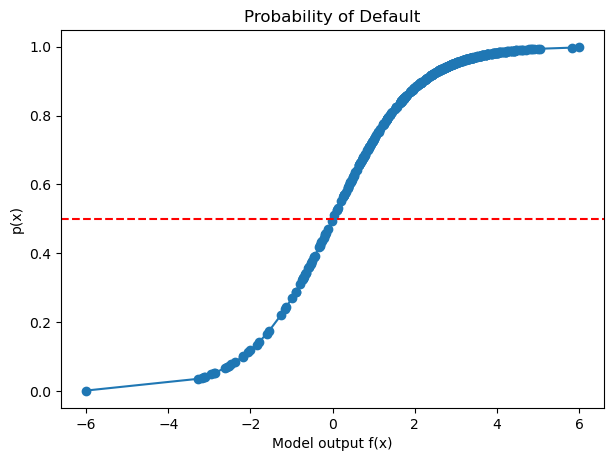

In [101]:
plt.figure(figsize=(7,5),dpi=100)

x = sorted(cs1)
y = expit(x)
plt.plot(x, y)
plt.scatter(x,y)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.title('Probability of Default')
plt.ylabel('p(x)')
plt.xlabel('Model output f(x)')

In [102]:
compare=pd.DataFrame(curve_df_test['Y'])

In [103]:
compare['prob'] = expit(curve_df_test['Y'])

In [104]:
compare['predict_status']=compare['prob'].apply(lambda x: int(1) if x>0.5 else int(0))

In [105]:
compare['Actual_status'] = test_df['Status']

In [106]:
compare

,Y,prob,predict_status,Actual_status
32.0,-0.579331,0.359087,0,0
44.0,-1.892049,0.131011,0,0
56.0,-0.698116,0.332230,0,0
58.0,-1.892860,0.130919,0,0
65.0,-0.879740,0.293232,0,0
...,...,...,...,...
2113.0,-2.102052,0.108898,0,1
2213.0,-1.776102,0.144785,0,1
2230.0,-3.226659,0.038175,0,1
2249.0,1.220285,0.772114,1,1


In [107]:
# successful predictions
compare[compare['predict_status'] == compare['Actual_status']]

,Y,prob,predict_status,Actual_status
32.0,-0.579331,0.359087,0,0
44.0,-1.892049,0.131011,0,0
56.0,-0.698116,0.332230,0,0
58.0,-1.892860,0.130919,0,0
65.0,-0.879740,0.293232,0,0
...,...,...,...,...
1794.0,0.233516,0.558115,1,1
1842.0,1.803670,0.858595,1,1
1859.0,1.575424,0.828555,1,1
1919.0,1.258393,0.778749,1,1


In [108]:
compare_0=compare[compare['Actual_status']==0]

compare_0[compare_0['predict_status'] == compare_0['Actual_status']]

percent_accuracy_0 = (len(compare_0[compare_0['predict_status'] == compare_0['Actual_status']]) / len(compare_0))*100 




compare_1=compare[compare['Actual_status']==1]

compare_1[compare_1['predict_status'] == compare_1['Actual_status']]

percent_accuracy_1 = (len(compare_1[compare_1['predict_status'] == compare_1['Actual_status']]) / len(compare_1))*100 



print(f"The active accuracy of the model output is : { percent_accuracy_0:0.1f}%")
#print(f"The bankrupt accuracy of the model output is : { percent_accuracy_1:0.1f}%")

The active accuracy of the model output is : 63.0%


## Model testing_2 for bankruptcy firms from 2002-2003

#### Import active test data

In [109]:
test_0 = pd.read_excel('Active Companies.xlsx', sheet_name = '0205', index_col=0)

In [110]:
test_0=test_0.replace({'n.a.': np.nan,'n.s.': np.nan})
test_0.shape

(46, 49)

In [111]:
#test_0=test_0.fillna(0)

In [112]:
###calculate ratios 

test_00=test_0[['Company name Latin alphabet',
                  'Liquidity ratio\nLast avail. yr', 'Liquidity ratio\nYear - 1', 
                   'Current ratio\nLast avail. yr', 'Current ratio\nYear - 1',
                   'Profit margin (%)\nLast avail. yr', 'Profit margin (%)\nYear - 1',
                  'Solvency ratio (Asset based) (%)\nLast avail. yr',  'Solvency ratio (Asset based) (%)\nYear - 1',
                   'Profit per employee (th) (th)\nth USD Last avail. yr', 'Profit per employee (th) (th)\nth USD Year - 1',
                   'Intangible fixed assets\nth USD Last avail. yr', 'Intangible fixed assets\nth USD Year - 1',
                  
                ]]

test_00['CL/TL avial year']=test_0['Current liabilities\nth USD Last avail. yr']/(test_0['Total shareh. funds & liab.\nth USD Last avail. yr']-test_0['Shareholders funds\nth USD Last avail. yr']) -test_0['Current liabilities\nth USD Year - 1']/(test_0['Total shareh. funds & liab.\nth USD Year - 1']-test_0['Shareholders funds\nth USD Year - 1'])
                                                                                    
test_00['CL/TL year-1']=test_0['Current liabilities\nth USD Year - 1']/(test_0['Total shareh. funds & liab.\nth USD Year - 1']-test_0['Shareholders funds\nth USD Year - 1']) -test_0['Current liabilities\nth USD Year - 2']/(test_0['Total shareh. funds & liab.\nth USD Year - 2']-test_0['Shareholders funds\nth USD Year - 2'])
                                   

#data2['CF/CapEX avil year']=data1['Cash flow\nth USD Last avail. yr']/data1['Capital Expenditures\nth USD Last avail. yr']
#data2['CF/CapEX year-1']=data1['Cash flow\nth USD Year - 1']/data1[ 'Capital Expenditures\nth USD Year - 1']


#### add in 6 more Financial ratios
# 1. Cash flow / Operating revenue 
test_00['Cash flow / Operating revenue'] = test_0['Operating revenue (Turnover)\nth USD Last avail. yr']
test_00['Cash flow / Operating revenue -1'] = test_0['Operating revenue (Turnover)\nth USD Year - 1']


# 2. operating revenue per employee
test_00['Operating revenue per employee'] = test_0['Operating revenue per employee (th) (th)\nth USD Last avail. yr']
test_00['Operating revenue per employee -1'] = test_0['Operating revenue per employee (th) (th)\nth USD Year - 1']


#3. Costs of employees / Operating revenue 
test_00['Costs of employees/Operating revenue'] = test_0['Costs of employees\nth USD Last avail. yr'] / test_0['Operating revenue (Turnover)\nth USD Last avail. yr']
test_00['Costs of employees/Operating revenue-1'] = test_0['Costs of employees\nth USD Year - 1'] / test_0['Operating revenue (Turnover)\nth USD Year - 1']

#4. Working Capital/Total Assets
test_00['Working Capital/Total Assets'] = test_0['Working capital\nth USD Last avail. yr'] / test_0['Total assets\nth USD Last avail. yr']
test_00['Working Capital/Total Assets -1'] = test_0['Working capital\nth USD Year - 1'] / test_0['Total assets\nth USD Year - 1']


# 6.  Sales / Total Assets
test_00['Sales/Total Asset'] = test_0['Sales\nth USD Last avail. yr'] / test_0['Total assets\nth USD Last avail. yr']
test_00['Sales/Total Asset-1'] = test_0['Sales\nth USD Year - 1'] / test_0['Total assets\nth USD Year - 1']

In [113]:
test2_a=test_00.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24]]

test2_b=test_00.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23]]

In [114]:
test2_a.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

test2_b.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

In [115]:
test2_cat=pd.concat([test2_a,test2_b])
test2_cat=test2_cat.fillna(0)
# Active firms
test2_cat.shape

(92, 13)

#### Import Bankruptcy test data 2002-2003

In [116]:
test_1 = pd.read_excel('world_bankrupt_tech.xlsx', sheet_name = '0203', index_col=0)

In [117]:
test_1=test_1.replace({'n.a.': np.nan,'n.s.': np.nan})
test_1.shape

(166, 49)

In [118]:
#test_1=test_1.fillna(0)

In [119]:
###calculate ratios 

test_11=test_1[['Company name Latin alphabet',
                  'Liquidity ratio\nLast avail. yr', 'Liquidity ratio\nYear - 1', 
                   'Current ratio\nLast avail. yr', 'Current ratio\nYear - 1',
                   'Profit margin (%)\nLast avail. yr', 'Profit margin (%)\nYear - 1',
                  'Solvency ratio (Asset based) (%)\nLast avail. yr',  'Solvency ratio (Asset based) (%)\nYear - 1',
                   'Profit per employee (th) (th)\nth USD Last avail. yr', 'Profit per employee (th) (th)\nth USD Year - 1',
                   'Intangible fixed assets\nth USD Last avail. yr', 'Intangible fixed assets\nth USD Year - 1',
                  
                ]]

test_11['CL/TL avial year']=test_1['Current liabilities\nth USD Last avail. yr']/(test_1['Total shareh. funds & liab.\nth USD Last avail. yr']-test_1['Shareholders funds\nth USD Last avail. yr']) -test_1['Current liabilities\nth USD Year - 1']/(test_1['Total shareh. funds & liab.\nth USD Year - 1']-test_1['Shareholders funds\nth USD Year - 1'])
                                                                                    
test_11['CL/TL year-1']=test_1['Current liabilities\nth USD Year - 1']/(test_1['Total shareh. funds & liab.\nth USD Year - 1']-test_1['Shareholders funds\nth USD Year - 1']) -test_1['Current liabilities\nth USD Year - 2']/(test_1['Total shareh. funds & liab.\nth USD Year - 2']-test_1['Shareholders funds\nth USD Year - 2'])
                                   

#data2['CF/CapEX avil year']=data1['Cash flow\nth USD Last avail. yr']/data1['Capital Expenditures\nth USD Last avail. yr']
#data2['CF/CapEX year-1']=data1['Cash flow\nth USD Year - 1']/data1[ 'Capital Expenditures\nth USD Year - 1']


#### add in 6 more Financial ratios
# 1. Cash flow / Operating revenue 
test_11['Cash flow / Operating revenue'] = test_1['Operating revenue (Turnover)\nth USD Last avail. yr']
test_11['Cash flow / Operating revenue -1'] = test_1['Operating revenue (Turnover)\nth USD Year - 1']


# 2. operating revenue per employee
test_11['Operating revenue per employee'] = test_1['Operating revenue per employee (th) (th)\nth USD Last avail. yr']
test_11['Operating revenue per employee -1'] = test_1['Operating revenue per employee (th) (th)\nth USD Year - 1']


#3. Costs of employees / Operating revenue 
test_11['Costs of employees/Operating revenue'] = test_1['Costs of employees\nth USD Last avail. yr'] / test_1['Operating revenue (Turnover)\nth USD Last avail. yr']
test_11['Costs of employees/Operating revenue-1'] = test_1['Costs of employees\nth USD Year - 1'] / test_1['Operating revenue (Turnover)\nth USD Year - 1']

#4. Working Capital/Total Assets
test_11['Working Capital/Total Assets'] = test_1['Working capital\nth USD Last avail. yr'] / test_1['Total assets\nth USD Last avail. yr']
test_11['Working Capital/Total Assets -1'] = test_1['Working capital\nth USD Year - 1'] / test_1['Total assets\nth USD Year - 1']


# 6.  Sales / Total Assets
test_11['Sales/Total Asset'] = test_1['Sales\nth USD Last avail. yr'] / test_1['Total assets\nth USD Last avail. yr']
test_11['Sales/Total Asset-1'] = test_1['Sales\nth USD Year - 1'] / test_1['Total assets\nth USD Year - 1']

In [120]:
test_11_a=test_11.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24]]

test_11_b=test_11.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23]]

In [121]:
test_11_a.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

test_11_b.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

In [122]:
test1_cat=pd.concat([test_11_a,test_11_b])
test1_cat=test1_cat.fillna(0)
# Bankruptcy firms
test1_cat.shape

(332, 13)

In [123]:
#  Active firms
#test2_cat = test2_cat.sample(n=30, replace = True)
#test2_cat = test2_cat_select
#  Bankruptcy firms
#test1_cat = test1_cat.sample(n=30, replace = True)
#test1_cat = test1_cat_select

In [124]:
test2_cat.insert(0, 'Status', int(0))
test1_cat.insert(0,'Status', int(1))

test_df=pd.concat([test2_cat, test1_cat])

In [125]:
test_df=test_df.fillna(0)

In [126]:
test_df.isna().sum()

Status                                  0
Company name                            0
 Liquidity ratio                        0
 Current ratio                          0
Profit margin (%)                       0
Solvency ratio (Asset based) (%)        0
Profit per employee                     0
Intangible fixed assets                 0
CL/TL                                   0
CF/Operating Revenue                    0
Operating revenue per employee          0
Costs of employees/Operating revenue    0
Working Capital/Total Assets            0
Sales/Total Asset                       0
dtype: int64

#### Test DataFrame

In [127]:
test_df.shape

(424, 14)

### Model output: `Y (Z-Score)` of Test Data

In [128]:
result.params

 Current ratio                         -1.596980
Intangible fixed assets                -0.816543
CF/Operating Revenue                    0.053952
Costs of employees/Operating revenue   -1.706327
Sales/Total Asset                       4.054102
dtype: float64

In [129]:
def  row_values():
    x=[]
    for i in range(len(curve_df_test)):
        for j in range(len(result.params)):
            x_value = curve_df_test.iloc[i,:].values[j] * result.params[j]
        x_sum = x_value.sum()
        x.append(x_sum)
    return x

In [130]:
log_test_df=np.log10(test_df.iloc[:,2:]).round(4).fillna(0)

In [131]:
curve_df_test=log_test_df[[' Current ratio', 'Intangible fixed assets', 'CF/Operating Revenue','Costs of employees/Operating revenue','Sales/Total Asset']]
curve_df_test['Y'] = row_values()

In [132]:
curve_df_test

,Current ratio,Intangible fixed assets,CF/Operating Revenue,Costs of employees/Operating revenue,Sales/Total Asset,Y
32.0,0.0449,6.7243,7.5382,0.0,-0.1429,-0.579331
44.0,-0.2668,6.2006,7.3075,0.0,-0.4667,-1.892049
56.0,0.0145,6.1274,7.0778,0.0,-0.1722,-0.698116
58.0,0.2322,7.3255,7.1940,0.0,-0.4669,-1.892860
65.0,-0.2692,6.6067,7.1479,0.0,-0.2170,-0.879740
...,...,...,...,...,...,...
2113.0,0.6775,0.0000,1.1760,0.0,-0.5185,-2.102052
2213.0,0.8016,0.0000,0.8659,0.0,-0.4381,-1.776102
2230.0,-0.0177,0.0000,0.8154,0.0,-0.7959,-3.226659
2249.0,-0.3979,0.0000,0.7302,0.0,0.3010,1.220285


### The logistic regression function 𝑝(𝐱)

Goal is to find the logistic regression function 𝑝(𝐱) such that the predicted responses 𝑝(𝐱ᵢ) are as close as possible to the actual response 𝑦ᵢ for each observation 𝑖 = 1, …, 𝑛. Remember that the actual response can be only 0 or 1 in binary classification problems! This means that each 𝑝(𝐱ᵢ) should be close to either 0 or 1. That’s why it’s convenient to use the `sigmoid function.`

`The logistic regression function 𝑝(𝐱)` is the sigmoid function of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱)). As such, it’s often close to either 0 or 1. The function 𝑝(𝐱) is often interpreted as the predicted probability that the output for a given 𝐱 is equal to 1. Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0.

#### Methodology


Logistic regression is a linear classifier, so you’ll use a linear function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, also called the `logit`. The variables 𝑏₀, 𝑏₁, …, 𝑏ᵣ are the estimators of the regression coefficients, which are also called the `predicted weights` or just `coefficients`.

Get the predicted outputs 𝑝(𝐱ᵢ) for any given input 𝐱ᵢ. For each observation 𝑖 = 1, …, 𝑛, `the predicted output is 1 if 𝑝(𝐱ᵢ) > 0.5 and 0 otherwise`. 

There’s one more important relationship between 𝑝(𝐱) and 𝑓(𝐱), which is that` log(𝑝(𝐱) / (1 − 𝑝(𝐱))) = 𝑓(𝐱).` This equality explains why 𝑓(𝐱) is the logit. It implies that 𝑝(𝐱) = 0.5 when 𝑓(𝐱) = 0 and that the predicted output is 1 if 𝑓(𝐱) > 0 and 0 otherwise.

In [133]:
# Standardised Y after log normalize
cs = curve_df_test['Y']

# rearange
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-6,6))
cs1 = scaler.fit_transform(cs.values.reshape(-1, 1))

In [134]:
# calculate the probability of Y 
from scipy.special import expit
prob=expit(cs1)
prob

array([[0.69934681],
       [0.36184385],
       [0.67182705],
       [0.36164255],
       [0.62741922],
       [0.56378755],
       [0.32625357],
       [0.3291348 ],
       [0.95010761],
       [0.45548923],
       [0.88599038],
       [0.34274849],
       [0.59238045],
       [0.68654807],
       [0.6350298 ],
       [0.94490796],
       [0.60723816],
       [0.16790648],
       [0.13573199],
       [0.89413451],
       [0.07822285],
       [0.59983226],
       [0.57020908],
       [0.56849889],
       [0.80100641],
       [0.86735739],
       [0.87669437],
       [0.71219984],
       [0.76010727],
       [0.85452637],
       [0.75174307],
       [0.93877653],
       [0.84155601],
       [0.70789187],
       [0.98256609],
       [0.98589008],
       [0.90914716],
       [0.84728258],
       [0.9482574 ],
       [0.07074576],
       [0.49547729],
       [0.96007208],
       [0.53118336],
       [0.43235682],
       [0.65567853],
       [0.78892992],
       [0.79109945],
       [0.388

Text(0.5, 0, 'Model output f(x)')

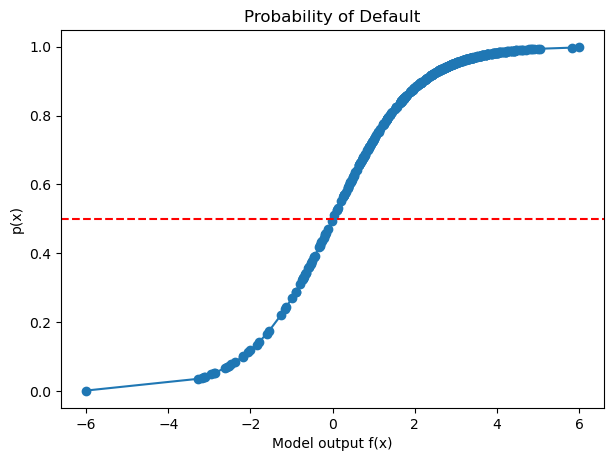

In [135]:
plt.figure(figsize=(7,5),dpi=100)

x = sorted(cs1)
y = expit(x)
plt.plot(x, y)
plt.scatter(x,y)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.title('Probability of Default')
plt.ylabel('p(x)')
plt.xlabel('Model output f(x)')

In [136]:
compare=pd.DataFrame(curve_df_test['Y'])

In [137]:
compare['prob'] = expit(curve_df_test['Y'])

In [138]:
compare['predict_status']=compare['prob'].apply(lambda x: int(1) if x>0.5 else int(0))

In [139]:
compare['Actual_status'] = test_df['Status']

In [140]:
compare

,Y,prob,predict_status,Actual_status
32.0,-0.579331,0.359087,0,0
44.0,-1.892049,0.131011,0,0
56.0,-0.698116,0.332230,0,0
58.0,-1.892860,0.130919,0,0
65.0,-0.879740,0.293232,0,0
...,...,...,...,...
2113.0,-2.102052,0.108898,0,1
2213.0,-1.776102,0.144785,0,1
2230.0,-3.226659,0.038175,0,1
2249.0,1.220285,0.772114,1,1


In [141]:
# successful predictions
compare[compare['predict_status'] == compare['Actual_status']]

,Y,prob,predict_status,Actual_status
32.0,-0.579331,0.359087,0,0
44.0,-1.892049,0.131011,0,0
56.0,-0.698116,0.332230,0,0
58.0,-1.892860,0.130919,0,0
65.0,-0.879740,0.293232,0,0
...,...,...,...,...
1794.0,0.233516,0.558115,1,1
1842.0,1.803670,0.858595,1,1
1859.0,1.575424,0.828555,1,1
1919.0,1.258393,0.778749,1,1


In [142]:
compare_0=compare[compare['Actual_status']==0]

compare_0[compare_0['predict_status'] == compare_0['Actual_status']]

percent_accuracy_0 = (len(compare_0[compare_0['predict_status'] == compare_0['Actual_status']]) / len(compare_0))*100 




compare_1=compare[compare['Actual_status']==1]

compare_1[compare_1['predict_status'] == compare_1['Actual_status']]

percent_accuracy_1 = (len(compare_1[compare_1['predict_status'] == compare_1['Actual_status']]) / len(compare_1))*100 



#print(f"The active accuracy of the model output is : { percent_accuracy_0:0.1f}%")
#print(f"The bankrupt accuracy of the model output is : { percent_accuracy_1:0.1f}%")

In [143]:
comapre=compare.reset_index()

In [144]:
a1=compare_1[compare_1['predict_status'] == compare_1['Actual_status']]

In [145]:
a1=a1.reset_index()

In [146]:
len(a1[a1['prob']>0.8])/len(a1)

0.5333333333333333

In [147]:
len(a1)

255

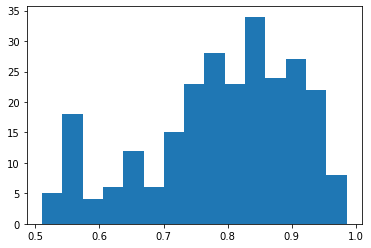

In [148]:
plt.hist(a1['prob'], bins=15)
plt.show()

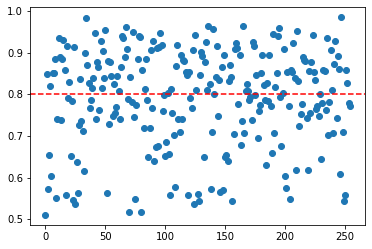

In [149]:
plt.scatter(a1.index, a1['prob'])
plt.axhline(y=0.8, color='r', linestyle='--')

In [150]:
print(f"The bankrupt accuracy of the model output is : { percent_accuracy_1:0.1f}%")

The bankrupt accuracy of the model output is : 76.8%


In [151]:
percent_accuracy = (len(compare[compare['predict_status'] == compare['Actual_status']]) / len(compare))*100 

print(f"The total accuracy of the model output is : { percent_accuracy:0.1f}%")

The total accuracy of the model output is : 73.8%


In [152]:
#w0=len(compare[compare['Actual_status']==0])/len(compare)

In [153]:
#w1=len(compare[compare['Actual_status']==1])/len(compare)

In [154]:
#Total_acc = w1*((len(compare_1[compare_1['predict_status'] == compare_1['Actual_status']]) / len(compare_1))*100 ) + w0*((len(compare_0[compare_0['predict_status'] == compare_0['Actual_status']]) / len(compare_0))*100) 

# Importing test data from 2017/2018/2019

#### Import active test data

In [155]:
test_0 = pd.read_excel('Active Companies.xlsx', sheet_name = '171819', index_col=0)

In [156]:
#test_0 = test_0[test_0.iloc[:,1] == 2019]

In [157]:
test_0=test_0.replace({'n.a.': np.nan,'n.s.': np.nan})
test_0.shape

(688, 49)

In [158]:
#test_0=test_0.fillna(0)

In [159]:
#test_0=test_0.sample(194)

In [160]:
###calculate ratios 

test_00=test_0[['Company name Latin alphabet',
                  'Liquidity ratio\nLast avail. yr', 'Liquidity ratio\nYear - 1', 
                   'Current ratio\nLast avail. yr', 'Current ratio\nYear - 1',
                   'Profit margin (%)\nLast avail. yr', 'Profit margin (%)\nYear - 1',
                  'Solvency ratio (Asset based) (%)\nLast avail. yr',  'Solvency ratio (Asset based) (%)\nYear - 1',
                   'Profit per employee (th) (th)\nth USD Last avail. yr', 'Profit per employee (th) (th)\nth USD Year - 1',
                   'Intangible fixed assets\nth USD Last avail. yr', 'Intangible fixed assets\nth USD Year - 1',
                  
                ]]

test_00['CL/TL avial year']=test_0['Current liabilities\nth USD Last avail. yr']/(test_0['Total shareh. funds & liab.\nth USD Last avail. yr']-test_0['Shareholders funds\nth USD Last avail. yr']) -test_0['Current liabilities\nth USD Year - 1']/(test_0['Total shareh. funds & liab.\nth USD Year - 1']-test_0['Shareholders funds\nth USD Year - 1'])
                                                                                    
test_00['CL/TL year-1']=test_0['Current liabilities\nth USD Year - 1']/(test_0['Total shareh. funds & liab.\nth USD Year - 1']-test_0['Shareholders funds\nth USD Year - 1']) -test_0['Current liabilities\nth USD Year - 2']/(test_0['Total shareh. funds & liab.\nth USD Year - 2']-test_0['Shareholders funds\nth USD Year - 2'])
                                   

#data2['CF/CapEX avil year']=data1['Cash flow\nth USD Last avail. yr']/data1['Capital Expenditures\nth USD Last avail. yr']
#data2['CF/CapEX year-1']=data1['Cash flow\nth USD Year - 1']/data1[ 'Capital Expenditures\nth USD Year - 1']


#### add in 6 more Financial ratios
# 1. Cash flow / Operating revenue 
test_00['Cash flow / Operating revenue'] = test_0['Operating revenue (Turnover)\nth USD Last avail. yr']
test_00['Cash flow / Operating revenue -1'] = test_0['Operating revenue (Turnover)\nth USD Year - 1']


# 2. operating revenue per employee
test_00['Operating revenue per employee'] = test_0['Operating revenue per employee (th) (th)\nth USD Last avail. yr']
test_00['Operating revenue per employee -1'] = test_0['Operating revenue per employee (th) (th)\nth USD Year - 1']


#3. Costs of employees / Operating revenue 
test_00['Costs of employees/Operating revenue'] = test_0['Costs of employees\nth USD Last avail. yr'] / test_0['Operating revenue (Turnover)\nth USD Last avail. yr']
test_00['Costs of employees/Operating revenue-1'] = test_0['Costs of employees\nth USD Year - 1'] / test_0['Operating revenue (Turnover)\nth USD Year - 1']

#4. Working Capital/Total Assets
test_00['Working Capital/Total Assets'] = test_0['Working capital\nth USD Last avail. yr'] / test_0['Total assets\nth USD Last avail. yr']
test_00['Working Capital/Total Assets -1'] = test_0['Working capital\nth USD Year - 1'] / test_0['Total assets\nth USD Year - 1']


# 6.  Sales / Total Assets
test_00['Sales/Total Asset'] = test_0['Sales\nth USD Last avail. yr'] / test_0['Total assets\nth USD Last avail. yr']
test_00['Sales/Total Asset-1'] = test_0['Sales\nth USD Year - 1'] / test_0['Total assets\nth USD Year - 1']

In [161]:
test2_a=test_00.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24]]

test2_b=test_00.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23]]

In [162]:
test2_a.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

test2_b.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

In [163]:
test2_cat=pd.concat([test2_a,test2_b])

#test2_cat =test2_cat.dropna(thresh=6)
#test2_cat=test2_cat.drop(test2_cat.columns[100*(test2_cat.isna().sum()/len(test2_cat))>90], axis=1)

test2_cat=test2_cat.fillna(0)

In [164]:

# Active firms
test2_cat.shape

(1376, 13)

#### Import Bankruptcy test data

In [165]:
test_1 = pd.read_excel('world_bankrupt_tech.xlsx', sheet_name = '171819', index_col=0)

In [166]:
#test_1 = test_1[(test_1.iloc[:,1]>2018) & (test_1.iloc[:,1]<2020) ]

In [167]:
test_1=test_1.replace({'n.a.': np.nan,'n.s.': np.nan})

In [168]:
test_1.shape

(281, 49)

In [169]:
#test_1=test_1.sample(194)

In [170]:
###calculate ratios 

test_11=test_1[['Company name Latin alphabet',
                  'Liquidity ratio\nLast avail. yr', 'Liquidity ratio\nYear - 1', 
                   'Current ratio\nLast avail. yr', 'Current ratio\nYear - 1',
                   'Profit margin (%)\nLast avail. yr', 'Profit margin (%)\nYear - 1',
                  'Solvency ratio (Asset based) (%)\nLast avail. yr',  'Solvency ratio (Asset based) (%)\nYear - 1',
                   'Profit per employee (th) (th)\nth USD Last avail. yr', 'Profit per employee (th) (th)\nth USD Year - 1',
                   'Intangible fixed assets\nth USD Last avail. yr', 'Intangible fixed assets\nth USD Year - 1',
                  
                ]]

test_11['CL/TL avial year']=test_1['Current liabilities\nth USD Last avail. yr']/(test_1['Total shareh. funds & liab.\nth USD Last avail. yr']-test_1['Shareholders funds\nth USD Last avail. yr']) -test_1['Current liabilities\nth USD Year - 1']/(test_1['Total shareh. funds & liab.\nth USD Year - 1']-test_1['Shareholders funds\nth USD Year - 1'])
                                                                                    
test_11['CL/TL year-1']=test_1['Current liabilities\nth USD Year - 1']/(test_1['Total shareh. funds & liab.\nth USD Year - 1']-test_1['Shareholders funds\nth USD Year - 1']) -test_1['Current liabilities\nth USD Year - 2']/(test_1['Total shareh. funds & liab.\nth USD Year - 2']-test_1['Shareholders funds\nth USD Year - 2'])
                                   

#data2['CF/CapEX avil year']=data1['Cash flow\nth USD Last avail. yr']/data1['Capital Expenditures\nth USD Last avail. yr']
#data2['CF/CapEX year-1']=data1['Cash flow\nth USD Year - 1']/data1[ 'Capital Expenditures\nth USD Year - 1']


#### add in 6 more Financial ratios
# 1. Cash flow / Operating revenue 
test_11['Cash flow / Operating revenue'] = test_1['Operating revenue (Turnover)\nth USD Last avail. yr']
test_11['Cash flow / Operating revenue -1'] = test_1['Operating revenue (Turnover)\nth USD Year - 1']


# 2. operating revenue per employee
test_11['Operating revenue per employee'] = test_1['Operating revenue per employee (th) (th)\nth USD Last avail. yr']
test_11['Operating revenue per employee -1'] = test_1['Operating revenue per employee (th) (th)\nth USD Year - 1']


#3. Costs of employees / Operating revenue 
test_11['Costs of employees/Operating revenue'] = test_1['Costs of employees\nth USD Last avail. yr'] / test_1['Operating revenue (Turnover)\nth USD Last avail. yr']
test_11['Costs of employees/Operating revenue-1'] = test_1['Costs of employees\nth USD Year - 1'] / test_1['Operating revenue (Turnover)\nth USD Year - 1']

#4. Working Capital/Total Assets
test_11['Working Capital/Total Assets'] = test_1['Working capital\nth USD Last avail. yr'] / test_1['Total assets\nth USD Last avail. yr']
test_11['Working Capital/Total Assets -1'] = test_1['Working capital\nth USD Year - 1'] / test_1['Total assets\nth USD Year - 1']


# 6.  Sales / Total Assets
test_11['Sales/Total Asset'] = test_1['Sales\nth USD Last avail. yr'] / test_1['Total assets\nth USD Last avail. yr']
test_11['Sales/Total Asset-1'] = test_1['Sales\nth USD Year - 1'] / test_1['Total assets\nth USD Year - 1']

In [171]:
test_11_a=test_11.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24]]

test_11_b=test_11.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23]]

In [172]:
test_11_a.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

test_11_b.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

In [173]:
test1_cat=pd.concat([test_11_a,test_11_b])

#test1_cat =test1_cat.dropna(thresh=6)
#test1_cat=test1_cat.drop(test1_cat.columns[100*(test1_cat.isna().sum()/len(test1_cat))>90], axis=1)

test1_cat=test1_cat.fillna(0)
# Bankruptcy firms

In [174]:
test1_cat.shape

(562, 13)

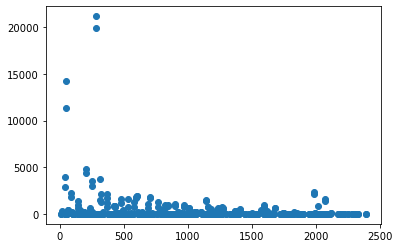

In [175]:
plt.scatter(test1_cat.index,test1_cat['Intangible fixed assets'])

In [176]:
#test1_cat = test1_cat[test1_cat['Intangible fixed assets'] < 1000]

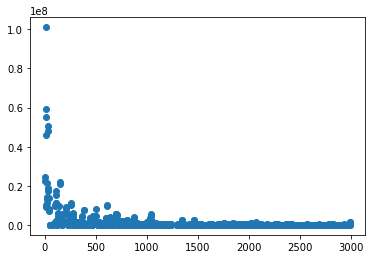

In [177]:
plt.scatter(test2_cat.index,test2_cat['Intangible fixed assets'])

In [178]:
#test2_cat=test2_cat[test2_cat['Intangible fixed assets'] < 1000]

In [179]:
#  Active firms
test2_cat.shape

(1376, 13)

In [180]:
#  Bankruptcy firms
test1_cat.shape

(562, 13)

In [181]:
1056*0.2

211.20000000000002

In [182]:
#  Active firms
#test2_cat = test2_cat.sample(n=250, replace = True)
#test2_cat = test2_cat_select
#  Bankruptcy firms
#test1_cat = test1_cat.sample(n=211, replace = True)
#test1_cat = test1_cat_select

In [183]:
test2_cat.insert(0, 'Status', int(0))
test1_cat.insert(0,'Status', int(1))

test_df=pd.concat([test2_cat, test1_cat])

In [184]:
test_df=test_df.fillna(0)

In [185]:
test_df.isna().sum()

Status                                  0
Company name                            0
 Liquidity ratio                        0
 Current ratio                          0
Profit margin (%)                       0
Solvency ratio (Asset based) (%)        0
Profit per employee                     0
Intangible fixed assets                 0
CL/TL                                   0
CF/Operating Revenue                    0
Operating revenue per employee          0
Costs of employees/Operating revenue    0
Working Capital/Total Assets            0
Sales/Total Asset                       0
dtype: int64

#### Test DataFrame

In [186]:
test_df.shape

(1938, 14)

In [187]:
test_df.head()

,Status,Company name,Liquidity ratio,Current ratio,Profit margin (%),Solvency ratio (Asset based) (%),Profit per employee,Intangible fixed assets,CL/TL,CF/Operating Revenue,Operating revenue per employee,Costs of employees/Operating revenue,Working Capital/Total Assets,Sales/Total Asset
8.0,0,NIPPON TELEGRAPH AND TELEPHONE CORPORATION,1.195,1.259,14.073,52.948,49.687242,2.266763e+07,0.035004,1.071028e+08,353.065589,0.000000,0.098510,0.532844
10.0,0,SOFTBANK GROUP CORP,0.852,0.894,17.614,24.959,198.370478,1.010968e+08,0.050358,8.656903e+07,1126.233009,0.000000,0.022104,0.266016
17.0,0,LEGEND HOLDINGS CORPORATION,0.663,0.740,2.503,14.871,17.317576,9.366186e+06,0.087021,5.188729e+07,691.830537,0.082765,0.045036,0.635602
18.0,0,VODAFONE GROUP PLC,1.532,1.560,-6.156,44.410,-31.595444,4.606910e+07,-0.089326,5.081251e+07,513.278440,0.118314,-0.007882,0.316578
23.0,0,KDDI CORPORATION,1.700,1.765,19.886,62.929,216.881165,1.340184e+07,-0.081453,4.580196e+07,1090.626687,0.000000,0.248105,0.693051


### Model output: `Y ` of Test Data

In [188]:
result.params

 Current ratio                         -1.596980
Intangible fixed assets                -0.816543
CF/Operating Revenue                    0.053952
Costs of employees/Operating revenue   -1.706327
Sales/Total Asset                       4.054102
dtype: float64

In [189]:
def  row_values():
    x=[]
    for i in range(len(curve_df_test)):
        for j in range(len(result.params)):
            x_value = curve_df_test.iloc[i,:].values[j] * result.params[j]
        x_sum = x_value.sum()
        x.append(x_sum)
    return x

In [190]:
log_test_df=np.log10(test_df.iloc[:,2:]).round(4).fillna(0)

In [191]:
curve_df_test=log_test_df[[' Current ratio','Intangible fixed assets','CF/Operating Revenue','Costs of employees/Operating revenue','Sales/Total Asset']]
curve_df_test['Y'] = row_values()

In [192]:
curve_df_test

,Current ratio,Intangible fixed assets,CF/Operating Revenue,Costs of employees/Operating revenue,Sales/Total Asset,Y
8.0,0.1000,7.3554,8.0298,0.0000,-0.2734,-1.108391
10.0,-0.0487,8.0047,7.9374,0.0000,-0.5751,-2.331514
17.0,-0.1308,6.9716,7.7151,-1.0822,-0.1968,-0.797847
18.0,0.1931,7.6634,7.7060,-0.9270,-0.4995,-2.025024
23.0,0.2467,7.1272,7.6609,0.0000,-0.1592,-0.645413
...,...,...,...,...,...,...
2254.0,-1.0315,0.0000,0.7193,0.0000,-1.0878,-4.410052
2280.0,0.0569,-0.4154,0.6204,0.0000,-1.0217,-4.142076
2303.0,-0.9957,0.0000,0.5044,0.0000,-0.7276,-2.949764
2329.0,0.2019,0.0000,0.3682,-0.3483,0.2262,0.917038


In [193]:
# Standardised Y after log normalize
cs = curve_df_test['Y']

# rearange
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-6,6))
cs1 = scaler.fit_transform(cs.values.reshape(-1, 1))

In [194]:
# calculate the probability of Y 
from scipy.special import expit
prob=expit(cs1)
prob

array([[0.38740958],
       [0.26109391],
       [0.42301028],
       ...,
       [0.20841395],
       [0.62379215],
       [0.12736069]])

Text(0.5, 0, 'Model output f(x)')

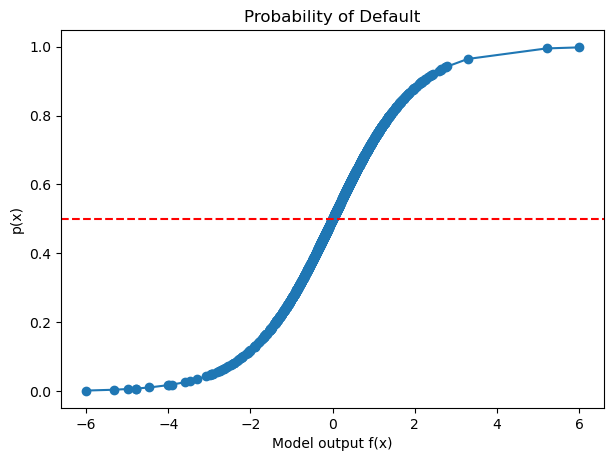

In [195]:
plt.figure(figsize=(7,5),dpi=100)

x = sorted(cs1)
y = expit(x)
plt.plot(x, y)
plt.scatter(x,y)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.title('Probability of Default')
plt.ylabel('p(x)')
plt.xlabel('Model output f(x)')

In [196]:
compare=pd.DataFrame(curve_df_test['Y'])

In [197]:
compare['prob'] = expit(curve_df_test['Y'])

In [198]:
compare['predict_status']=compare['prob'].apply(lambda x: int(1) if x>0.5 else int(0))

In [199]:
compare['Actual_status'] = test_df['Status'] 

In [200]:
compare

,Y,prob,predict_status,Actual_status
8.0,-1.108391,0.248171,0,0
10.0,-2.331514,0.088546,0,0
17.0,-0.797847,0.310486,0,0
18.0,-2.025024,0.116601,0,0
23.0,-0.645413,0.344024,0,0
...,...,...,...,...
2254.0,-4.410052,0.012009,0,1
2280.0,-4.142076,0.015641,0,1
2303.0,-2.949764,0.049748,0,1
2329.0,0.917038,0.714438,1,1


In [201]:
# successful predictions
compare[compare['predict_status'] == compare['Actual_status']]

,Y,prob,predict_status,Actual_status
8.0,-1.108391,0.248171,0,0
10.0,-2.331514,0.088546,0,0
17.0,-0.797847,0.310486,0,0
18.0,-2.025024,0.116601,0,0
23.0,-0.645413,0.344024,0,0
...,...,...,...,...
2059.0,0.485681,0.619089,1,1
2071.0,2.693140,0.936621,1,1
2109.0,2.483948,0.923009,1,1
2187.0,0.891902,0.709283,1,1


In [202]:
compare_0=compare[compare['Actual_status']==0]

In [203]:
compare_0[compare_0['predict_status'] == compare_0['Actual_status']]

,Y,prob,predict_status,Actual_status
8.0,-1.108391,0.248171,0,0
10.0,-2.331514,0.088546,0,0
17.0,-0.797847,0.310486,0,0
18.0,-2.025024,0.116601,0,0
23.0,-0.645413,0.344024,0,0
...,...,...,...,...
2979.0,-1.808129,0.140864,0,0
2984.0,-1.136365,0.242988,0,0
2987.0,-1.772859,0.145187,0,0
2988.0,-0.371761,0.408116,0,0


In [204]:
percent_accuracy_0 = (len(compare_0[compare_0['predict_status'] == compare_0['Actual_status']]) / len(compare_0))*100 


print(f"The active accuracy of the model output is : { percent_accuracy_0:0.1f}%")

The active accuracy of the model output is : 51.6%


In [205]:
compare_1=compare[compare['Actual_status']==1]

compare_1[compare_1['predict_status'] == compare_1['Actual_status']]

percent_accuracy_1 = (len(compare_1[compare_1['predict_status'] == compare_1['Actual_status']]) / len(compare_1))*100 


print(f"The bankrupt accuracy of the model output is : { percent_accuracy_1:0.1f}%")

The bankrupt accuracy of the model output is : 56.4%


In [206]:
compare_1

,Y,prob,predict_status,Actual_status
10.0,1.380422,0.799059,1,1
15.0,1.513396,0.819564,1,1
39.0,1.615154,0.834126,1,1
41.0,1.988942,0.879631,1,1
44.0,-0.750009,0.320819,0,1
...,...,...,...,...
2254.0,-4.410052,0.012009,0,1
2280.0,-4.142076,0.015641,0,1
2303.0,-2.949764,0.049748,0,1
2329.0,0.917038,0.714438,1,1


In [207]:
#a0=compare_0[compare_0['predict_status'] == compare_0['Actual_status']]

In [208]:
a1=compare_1[compare_1['predict_status'] == compare_1['Actual_status']]

In [209]:
a1=a1.reset_index()

In [210]:
len(a1[a1['prob']>0.8])/len(a1)

0.5520504731861199

In [211]:
#a1=a1.sample(311)

In [212]:
len(a1)

317

(0.5, 1.01)

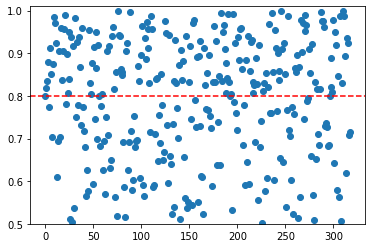

In [213]:
plt.scatter(np.linspace(0,317,317) , a1['prob'])
plt.axhline(y=0.8, color='r', linestyle='--')
plt.ylim([0.5,1.01])

In [214]:
#plt.hist(a1['prob'], bins=15)

In [215]:
percent_accuracy = (len(compare[compare['predict_status'] == compare['Actual_status']]) / len(compare))*100 

#print(f"The accuracy of the active output is : {(16/30)*100:0.1f}%")
#print(f"The accuracy of the bankrupt output is : { (29/30)*100:0.1f}%")

print(f"The total accuracy of the model output is : { percent_accuracy:0.1f}%")

The total accuracy of the model output is : 53.0%


# Importing test data from 2019/2020

#### Import active test data

In [216]:
test_0 = pd.read_excel('Active Companies.xlsx', sheet_name = '2020', index_col=0)

In [217]:
#test_0 = test_0[(test_0.iloc[:,1] > 2018) & (test_0.iloc[:,1] < 2021)]

In [218]:
test_0=test_0.replace({'n.a.': np.nan,'n.s.': np.nan})
test_0.shape

(363, 49)

In [219]:
#test_0=test_0.fillna(0)

In [220]:
#test_0=test_0.sample(194)

In [221]:
###calculate ratios 

test_00=test_0[['Company name Latin alphabet',
                  'Liquidity ratio\nLast avail. yr', 'Liquidity ratio\nYear - 1', 
                   'Current ratio\nLast avail. yr', 'Current ratio\nYear - 1',
                   'Profit margin (%)\nLast avail. yr', 'Profit margin (%)\nYear - 1',
                  'Solvency ratio (Asset based) (%)\nLast avail. yr',  'Solvency ratio (Asset based) (%)\nYear - 1',
                   'Profit per employee (th) (th)\nth USD Last avail. yr', 'Profit per employee (th) (th)\nth USD Year - 1',
                   'Intangible fixed assets\nth USD Last avail. yr', 'Intangible fixed assets\nth USD Year - 1',
                  
                ]]

test_00['CL/TL avial year']=test_0['Current liabilities\nth USD Last avail. yr']/(test_0['Total shareh. funds & liab.\nth USD Last avail. yr']-test_0['Shareholders funds\nth USD Last avail. yr']) -test_0['Current liabilities\nth USD Year - 1']/(test_0['Total shareh. funds & liab.\nth USD Year - 1']-test_0['Shareholders funds\nth USD Year - 1'])
                                                                                    
test_00['CL/TL year-1']=test_0['Current liabilities\nth USD Year - 1']/(test_0['Total shareh. funds & liab.\nth USD Year - 1']-test_0['Shareholders funds\nth USD Year - 1']) -test_0['Current liabilities\nth USD Year - 2']/(test_0['Total shareh. funds & liab.\nth USD Year - 2']-test_0['Shareholders funds\nth USD Year - 2'])
                                   

#data2['CF/CapEX avil year']=data1['Cash flow\nth USD Last avail. yr']/data1['Capital Expenditures\nth USD Last avail. yr']
#data2['CF/CapEX year-1']=data1['Cash flow\nth USD Year - 1']/data1[ 'Capital Expenditures\nth USD Year - 1']


#### add in 6 more Financial ratios
# 1. Cash flow / Operating revenue 
test_00['Cash flow / Operating revenue'] = test_0['Operating revenue (Turnover)\nth USD Last avail. yr']
test_00['Cash flow / Operating revenue -1'] = test_0['Operating revenue (Turnover)\nth USD Year - 1']


# 2. operating revenue per employee
test_00['Operating revenue per employee'] = test_0['Operating revenue per employee (th) (th)\nth USD Last avail. yr']
test_00['Operating revenue per employee -1'] = test_0['Operating revenue per employee (th) (th)\nth USD Year - 1']


#3. Costs of employees / Operating revenue 
test_00['Costs of employees/Operating revenue'] = test_0['Costs of employees\nth USD Last avail. yr'] / test_0['Operating revenue (Turnover)\nth USD Last avail. yr']
test_00['Costs of employees/Operating revenue-1'] = test_0['Costs of employees\nth USD Year - 1'] / test_0['Operating revenue (Turnover)\nth USD Year - 1']

#4. Working Capital/Total Assets
test_00['Working Capital/Total Assets'] = test_0['Working capital\nth USD Last avail. yr'] / test_0['Total assets\nth USD Last avail. yr']
test_00['Working Capital/Total Assets -1'] = test_0['Working capital\nth USD Year - 1'] / test_0['Total assets\nth USD Year - 1']


# 6.  Sales / Total Assets
test_00['Sales/Total Asset'] = test_0['Sales\nth USD Last avail. yr'] / test_0['Total assets\nth USD Last avail. yr']
test_00['Sales/Total Asset-1'] = test_0['Sales\nth USD Year - 1'] / test_0['Total assets\nth USD Year - 1']

In [222]:
#2019
test2_a=test_00.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24]]

#2020
test2_b=test_00.iloc[:,[0,1,3,5,7,9,11,13,15,17,19,21,23]]

In [223]:
test2_a.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

test2_b.columns=['Company name',' Liquidity ratio',' Current ratio','Profit margin (%)',
                'Solvency ratio (Asset based) (%)', 'Profit per employee', 'Intangible fixed assets',
                'CL/TL', 'CF/Operating Revenue', 'Operating revenue per employee',
                'Costs of employees/Operating revenue', 'Working Capital/Total Assets','Sales/Total Asset']

In [224]:
test2_2019 = test2_a.fillna(0)
test2_2020 = test2_b.fillna(0)

### Model output: `Y ` of Test Data

In [225]:
result.params

 Current ratio                         -1.596980
Intangible fixed assets                -0.816543
CF/Operating Revenue                    0.053952
Costs of employees/Operating revenue   -1.706327
Sales/Total Asset                       4.054102
dtype: float64

In [226]:
def  row_values():
    x=[]
    for i in range(len(curve_df_test)):
        for j in range(len(result.params)):
            x_value = curve_df_test.iloc[i,:].values[j] * result.params[j]
        x_sum = x_value.sum()
        x.append(x_sum)
    return x

### 2019

In [227]:
log_test_df=np.log10(test2_2019.iloc[:,2:]).round(4).fillna(0)

In [228]:
curve_df_test=log_test_df[[' Current ratio','Intangible fixed assets','CF/Operating Revenue','Costs of employees/Operating revenue','Sales/Total Asset']]
curve_df_test['Y'] = row_values()

In [229]:
#curve_df_test

In [230]:
prob_2019 = expit(curve_df_test['Y'])
prob_2019

1.0       0.281117
2.0       0.123450
4.0       0.198157
5.0       0.210411
6.0       0.201724
            ...   
2980.0    0.277282
2982.0    0.303929
2992.0    0.411057
2993.0    0.188547
2999.0    0.595405
Name: Y, Length: 363, dtype: float64

### 2020

In [231]:
log_test_df=np.log10(test2_2020.iloc[:,2:]).round(4).fillna(0)

In [232]:
curve_df_test=log_test_df[[' Current ratio','Intangible fixed assets','CF/Operating Revenue','Costs of employees/Operating revenue','Sales/Total Asset']]
curve_df_test['Y'] = row_values()

In [233]:
#curve_df_test

In [234]:
prob_2020 = expit(curve_df_test['Y'])
prob_2020

1.0       0.271631
2.0       0.122401
4.0       0.169438
5.0       0.154745
6.0       0.193496
            ...   
2980.0    0.292057
2982.0    0.074187
2992.0    0.343932
2993.0    0.182060
2999.0    0.620522
Name: Y, Length: 363, dtype: float64

In [235]:
df = pd.concat([test2_2019.iloc[:,0], prob_2019,prob_2020], axis = 1, ignore_index = True )

In [236]:
df.columns = ['name', '2019','2020']

In [237]:
df

,name,2019,2020
1.0,ALPHABET INC.,0.281117,0.271631
2.0,AT&T INC.,0.123450,0.122401
4.0,VERIZON COMMUNICATIONS INC,0.198157,0.169438
5.0,DEUTSCHE TELEKOM AG,0.210411,0.154745
6.0,CHINA MOBILE LIMITED,0.201724,0.193496
...,...,...,...
2980.0,"SYNCHRONOSS TECHNOLOGIES, INC.",0.277282,0.292057
2982.0,"FASTLY, INC.",0.303929,0.074187
2992.0,LECTRA,0.411057,0.343932
2993.0,KLDISCOVERY INC.,0.188547,0.182060


In [238]:
df_b=df[(df['2019']>0.5) & (df['2020']>0.5)]

In [239]:
df_b=df_b[df_b['2020']>df_b['2019']]

In [240]:
df_b['gap']=df_b['2020']-df_b['2019']

In [241]:
df_b[df_b['gap']>0.05]

,name,2019,2020,gap
203.0,AMAZON WEB SERVICES EMEA SARL,0.784356,0.843604,0.059248
2197.0,CLARANOVA S E,0.668489,0.763880,0.095390
2571.0,SIEMENS INDUSTRY SOFTWARE,0.672966,0.752962,0.079996


In [244]:
df_compare = df[(df['2019']>0.5) & (df['2020']>df['2019'])]
df_compare['gap'] = df_compare['2020'] - df_compare ['2019']
df_compare[df_compare['gap'] >0.04]

,name,2019,2020,gap
203.0,AMAZON WEB SERVICES EMEA SARL,0.784356,0.843604,0.059248
1724.0,SERVICE STREAM LIMITED,0.641660,0.690208,0.048548
2197.0,CLARANOVA S E,0.668489,0.763880,0.095390
2203.0,REAL MATTERS INC,0.693061,0.742719,0.049658
2303.0,"BEIJING EMAR ONLINE TECHNOLOGY CO.,LTD",0.876725,0.926561,0.049836
2571.0,SIEMENS INDUSTRY SOFTWARE,0.672966,0.752962,0.079996


### 2000 - 2020 Tech companies defaulting trend

In [242]:
trend = pd.read_excel('world_bankrupt_tech.xlsx',sheet_name = 'trend')

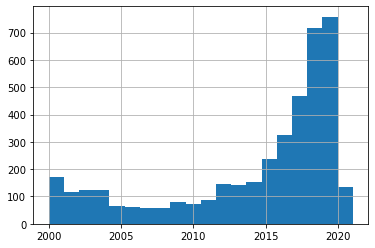

In [243]:
trend.iloc[:,2].hist(bins = 20)